In [1]:
from os import path

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


#import seaborn as sns

import pickle

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#sns.set_style('whitegrid',{'axes.grid':False})

In [4]:
# gen Calv met one pulse

um1 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112211.txt",header=None)
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_onepulse_2020112212.txt",header=None)


um = pd.concat([um1,um2])
print((len(um1)+len(um2))/len(um) )

1.0


In [7]:
# gen Calv met with stim
#um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_2020111812.txt",header=None)


# 22feb2021 lin1
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/met_gen_lin1long_um_2021022120.txt",header=None,sep = "\t")



In [37]:
# 22feb2021 lin1
param = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/met_gen_lin1long_param_2021022120.txt",header=None,sep = "\t")


In [38]:
param.columns = ['c_gid','rank','idxm',
                 'ina_density', 'const_ksi', 'voltages_per_gids', 'nais_mean', 'kis_mean', 
                 'ik_density', 'const41','pAKTPFK2', 'atpi_mean','atp_vm27','cais_mean','mito_scale','glutamatergic_gaba_scaling','outs_r_to_met','cells_volumes_um3']



In [3]:
# gen Calv met no stim

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_gen_nostim_2020112216.txt",header=None)

In [3]:
# full met no stim
um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_nostim_2020112211.txt",header=None)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-ipython-7.4.0-stqp435aw2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# um with met

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_2020111610.txt",header=None)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-ipython-7.4.0-stqp435aw2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# um with met

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_202011041221.txt",header=None)

In [4]:
um2 = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_202011131104.txt",header=None)

In [5]:
# um with met

um = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_withMet_202011131105.txt",header=None)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/gcc-8.3.0/py-ipython-7.4.0-stqp435aw2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# gen Calv 

um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')

40


In [ ]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys", "G6P_n", "F6P_n", "G6P_a", "F6P_a", "FBP_n", "FBP_a", "AMP_a", "GAP_n", "DHAP_n", "GAP_a", "DHAP_a", "Pi_n", "BPG13_n", "Pi_a", "BPG13_a", "PG3_n", "PG3_a", "PG2_n", "PG2_a", "PEP_n", "PEP_a", "G1P_a", "GLY_a", "UDPgluco", "UTP", "PP1_a", "GS_a", "GPa_a", "GPb_a", "cAMP_a", "PKAa_a", "PKAb_a", "PHKa_a", "R2CcAMP2_a", "R2CcAMP4_a", "K_a0", "Na_a0", "Va0", "Ca_a", "GLUT_out", "GLUT_a", "GLN_out", "GLN_a", "GLUT_syn", "f26bp_a0", "f26bp_n0", "PYRmito_n0", "CITmito_n0", "ISOCITmito_n0", "AKGmito_n0", "SUCCOAmito_n0", "SUCmito_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "AcCoAmito_n0", "CoAmito_n0", "NADmito_n0", "NADHmito_n0", "CaMito_n0", "ADPmito_n0", "ATPmito_n0", "Pimito_n0", "Qmito_n0", "QH2mito_n0", "CytCredmito_n0", "CytCoxmito_n0", "ASPmito_n0", "GLUmito_n0", "MAL_n0", "OXA_n0", "ASP_n0", "AKG_n0", "GL6P_n0", "GO6P_n0", "NADP_n0", "NADPH_n0", "RU5P_n0", "X5P_n0", "R5P_n0", "S7P_n0", "E4P_n0", "PYRmito_a", "CITmito_a", "ISOCITmito_a", "AKGmito_a", "SUCCOAmito_a", "SUCmito_a", "FUMmito_a", "MALmito_a", "OXAmito_a", "AcCoAmito_a", "CoAmito_a", "NADmito_a", "NADHmito_a", "CaMito_a", "ADPmito_a", "ATPmito_a", "Pimito_a", "Qmito_a", "QH2mito_a", "CytCredmito_a", "CytCoxmito_a", "ASPmito_a", "GLUmito_a", "MAL_a", "OXA_a", "ASP_a", "AKG_a", "GL6P_a", "GO6P_a", "NADP_a", "NADPH_a", "RU5P_a", "X5P_a", "R5P_a", "S7P_a", "E4P_a", "GSH_a", "GSSG_a", "GSH_n", "GSSG_n", "MitoMembrPotent_a", "MitoMembrPotent_n", "GLU_n", "NEneuromod", "AMP_n", "GLN_n", "GABA_inh_n","Vv","dHb"]
print(len(um_colnames))

um.columns =  um_colnames

um = um.add_prefix('with_met_')

In [10]:
um = um.rename(columns={"with_met_c_gid":"c_gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

In [11]:
um[um['idxm']==2].head()

c_gid  mpi_rank  idxm  with_met_VNeu0  with_met_m0  with_met_h0  \
45836   1133       151     2           -80.0     0.002110       0.9002   
45837  14259      2026     2           -80.0     0.002110       0.9002   
45838   1969       275     2           -80.0     0.002110       0.9002   
45839     48         7     2           -72.0     0.006178       0.9002   
45840   2237       313     2           -80.0     0.002110       0.9002   

       with_met_n0  with_met_Conc_Cl_out  with_met_Conc_Cl_in  with_met_Na0in  \
45836       0.1558                 140.0                  8.0       10.755320   
45837       0.1558                 140.0                  8.0       10.766051   
45838       0.1558                 140.0                  8.0       10.746445   
45839       0.1558                 140.0                  8.0       10.745878   
45840       0.1558                 140.0                  8.0       10.750465   

       with_met_K0out  with_met_Glc_b  with_met_Lac_b  with_met_O2_b  \
45836        4.957303        4.506821         1.23961       6.661664   
45837        4.966829        4.506821         1.23961       6.661664   
45838        4.943185        4.506821         1.23961       6.661664   
45839        4.971298        4.506821         1.23961       6.661664   
45840        4.951440        4.506821         1.23961       6.661664   

       with_met_q  with_met_Glc_ecs  with_met_Lac_ecs  with_met_O2_ecs  \
45836      0.0067          1.190485          1.300032         0.044066   
45837      0.0067          1.190485          1.300032         0.044066   
45838      0.0067          1.190485          1.300032         0.044066   
45839      0.0067          1.190485          1.300032         0.044066   
45840      0.0067          1.190485          1.300032         0.044066   

       with_met_O2_n  with_met_O2_a  with_met_Glc_n  with_met_Glc_a  \
45836       0.032755        0.02981        1.190369        0.650585   
45837       0.032755        0.02981        1.190369        0.650585   
45838       0.032755        0.02981        1.190369        0.650585   
45839       0.032755        0.02981        1.190369        0.650585   
45840       0.032755        0.02981        1.190369        0.650585   

       with_met_Lac_n  with_met_Lac_a  with_met_Pyr_n  with_met_Pyr_a  \
45836        1.299967        1.300284        0.380035        0.349669   
45837        1.299967        1.300284        0.380035        0.349669   
45838        1.299967        1.300284        0.380035        0.349669   
45839        1.299967        1.300284        0.380035        0.349669   
45840        1.299967        1.300284        0.380035        0.349669   

       with_met_PCr_n  with_met_PCr_a  with_met_Cr_n  with_met_Cr_a  \
45836       10.330298       10.320297       0.000002       0.000803   
45837       10.330298       10.320297       0.000002       0.000803   
45838       10.330298       10.320297       0.000002       0.000803   
45839       10.330298       10.320297       0.000002       0.000803   
45840       10.330298       10.320297       0.000002       0.000803   

       with_met_ATP_n  with_met_ATP_a  with_met_ADP_n  with_met_ADP_a  \
45836        2.186278        2.164482        0.000022        0.018518   
45837        2.186278        2.164480        0.000022        0.018520   
45838        2.186278        2.164484        0.000022        0.018516   
45839        2.186278        2.164480        0.000022        0.018520   
45840        2.186278        2.164482        0.000022        0.018518   

       with_met_NADH_n  with_met_NADH_a  with_met_NAD_n  with_met_NAD_a  \
45836         0.001145          0.00115        0.030055         0.03005   
45837         0.001145          0.00115        0.030055         0.03005   
45838         0.001145          0.00115        0.030055         0.03005   
45839         0.001145          0.00115        0.030055         0.03005   
45840         0.001145          0.00115        0.030055         0.03005   

       with_me

In [12]:
114516/10/22918

0.49967710969543594

In [51]:
len(um[0].unique())

230

In [10]:
len(um[0].unique()) + len(um2[0].unique())

22918

In [5]:
len(um[0].unique()) 

22918

In [6]:
um[2].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# um no met

um_nm = pd.read_csv("/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/um_noMet_ .txt",header=None)
print(len(um))
um_nm.head()

In [7]:
um_colnames = ["c_gid","mpi_rank","idxm","VNeu0", "m0", "h0", "n0", "Conc_Cl_out", "Conc_Cl_in", "Na0in", "K0out", "Glc_b", "Lac_b", "O2_b", "q", "Glc_ecs", "Lac_ecs", "O2_ecs", "O2_n", "O2_a", "Glc_n", "Glc_a", "Lac_n", "Lac_a", "Pyr_n", "Pyr_a", "PCr_n", "PCr_a", "Cr_n", "Cr_a", "ATP_n", "ATP_a", "ADP_n", "ADP_a", "NADH_n", "NADH_a", "NAD_n", "NAD_a", "ksi", "ksi_ephys", "G6P_n", "F6P_n", "G6P_a", "F6P_a", "FBP_n", "FBP_a", "AMP_a", "GAP_n", "DHAP_n", "GAP_a", "DHAP_a", "Pi_n", "BPG13_n", "Pi_a", "BPG13_a", "PG3_n", "PG3_a", "PG2_n", "PG2_a", "PEP_n", "PEP_a", "G1P_a", "GLY_a", "UDPgluco", "UTP", "PP1_a", "GS_a", "GPa_a", "GPb_a", "cAMP_a", "PKAa_a", "PKAb_a", "PHKa_a", "R2CcAMP2_a", "R2CcAMP4_a", "K_a0", "Na_a0", "Va0", "Ca_a", "GLUT_out", "GLUT_a", "GLN_out", "GLN_a", "GLUT_syn", "f26bp_a0", "f26bp_n0", "PYRmito_n0", "CITmito_n0", "ISOCITmito_n0", "AKGmito_n0", "SUCCOAmito_n0", "SUCmito_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "AcCoAmito_n0", "CoAmito_n0", "NADmito_n0", "NADHmito_n0", "CaMito_n0", "ADPmito_n0", "ATPmito_n0", "Pimito_n0", "Qmito_n0", "QH2mito_n0", "CytCredmito_n0", "CytCoxmito_n0", "ASPmito_n0", "GLUmito_n0", "MAL_n0", "OXA_n0", "ASP_n0", "AKG_n0", "GL6P_n0", "GO6P_n0", "NADP_n0", "NADPH_n0", "RU5P_n0", "X5P_n0", "R5P_n0", "S7P_n0", "E4P_n0", "PYRmito_a", "CITmito_a", "ISOCITmito_a", "AKGmito_a", "SUCCOAmito_a", "SUCmito_a", "FUMmito_a", "MALmito_a", "OXAmito_a", "AcCoAmito_a", "CoAmito_a", "NADmito_a", "NADHmito_a", "CaMito_a", "ADPmito_a", "ATPmito_a", "Pimito_a", "Qmito_a", "QH2mito_a", "CytCredmito_a", "CytCoxmito_a", "ASPmito_a", "GLUmito_a", "MAL_a", "OXA_a", "ASP_a", "AKG_a", "GL6P_a", "GO6P_a", "NADP_a", "NADPH_a", "RU5P_a", "X5P_a", "R5P_a", "S7P_a", "E4P_a", "GSH_a", "GSSG_a", "GSH_n", "GSSG_n", "MitoMembrPotent_a", "MitoMembrPotent_n", "GLU_n", "NEneuromod", "AMP_n", "GLN_n", "GABA_inh_n","Vv","dHb"]
print(len(um_colnames))

um.columns =  um_colnames

#um_nm.columns = um_colnames

um = um.add_prefix('with_met_')
#um_nm = um_nm.add_prefix('no_met_')

171


In [8]:
um.head()

with_met_c_gid  with_met_mpi_rank  with_met_idxm  with_met_VNeu0  \
0          6563.0                933              0           -73.0   
1          7228.0               1047              0           -73.0   
2          3358.0                468              0           -73.0   
3          6869.0                992              0           -73.0   
4          5593.0                788              0           -73.0   

   with_met_m0  with_met_h0  with_met_n0  with_met_Conc_Cl_out  \
0      0.00541       0.9002       0.1558                 130.0   
1      0.00541       0.9002       0.1558                 130.0   
2      0.00541       0.9002       0.1558                 130.0   
3      0.00541       0.9002       0.1558                 130.0   
4      0.00541       0.9002       0.1558                 130.0   

   with_met_Conc_Cl_in  with_met_Na0in  with_met_K0out  with_met_Glc_b  \
0                  7.0         11.5604             4.1            4.51   
1                  7.0         11.5604             4.1            4.51   
2                  7.0         11.5604             4.1            4.51   
3                  7.0         11.5604             4.1            4.51   
4                  7.0         11.5604             4.1            4.51   

   with_met_Lac_b  with_met_O2_b  with_met_q  with_met_Glc_ecs  \
0            1.24            7.3      0.0067              1.25   
1            1.24            7.3      0.0067              1.25   
2            1.24            7.3      0.0067              1.25   
3            1.24            7.3      0.0067              1.25   
4            1.24            7.3      0.0067              1.25   

   with_met_Lac_ecs  with_met_O2_ecs  with_met_O2_n  with_met_O2_a  \
0               1.2             0.04           0.03           0.03   
1               1.2             0.04           0.03           0.03   
2               1.2             0.04           0.03           0.03   
3               1.2             0.04           0.03           0.03   
4               1.2             0.04           0.03           0.03   

   with_met_Glc_n  with_met_Glc_a  with_met_Lac_n  with_met_Lac_a  \
0            1.19             1.2             1.2             1.2   
1            1.19             1.2             1.2             1.2   
2            1.19             1.2             1.2             1.2   
3            1.19             1.2             1.2             1.2   
4            1.19             1.2             1.2             1.2   

   with_met_Pyr_n  with_met_Pyr_a  with_met_PCr_n  with_met_PCr_a  \
0             0.3            0.04           10.33           10.32   
1             0.3            0.04           10.33           10.32   
2             0.3            0.04           10.33           10.32   
3             0.3            0.04           10.33           10.32   
4             0.3            0.04           10.33           10.32   

   with_met_Cr_n  with_met_Cr_a         with_met_ATP_n  with_met_ATP_a  \
0         0.0003         0.0011   0.048183910902645975             1.4   
1         0.0003         0.0011    0.07010773734273369             1.4   
2         0.0003         0.0011    0.05754267045151582             1.4   
3         0.0003         0.0011    0.07184022372018042             1.4   
4         0.0003         0.0011    0.04634009066994011             1.4   

        with_met_ADP_n  with_met_ADP_a  with_met_NADH_n  with_met_NADH_a  \
0   1.4838610713929306            0.03           0.0007           0.0007   
1   1.4310736145634562            0.03           0.0007           0.0007   
2   1.4593677332409232            0.03           0.0007           0.0007   
3   1.4347752909059808            0.03           0.0007           0.0007   
4   1.5342749377015004            0.03           0.0007           0.0007   

   with_met_NAD_n  with_met_NAD_a  with_met_ksi  with_met_ksi_ephys  \
0             0.5             0.5          0.06                0.06   
1             0.5             0.5         

In [9]:
len(um['with_met_c_gid'].unique())

22918

In [10]:
um = um.rename(columns={"with_met_c_gid":"c_gid",
                        "with_met_mpi_rank":"mpi_rank",
                        "with_met_idxm":"idxm"})

#um_nm = um_nm.rename(columns={"no_met_c_gid":"c_gid",
#                        "no_met_mpi_rank":"mpi_rank",
#                        "no_met_idxm":"idxm"})


In [ ]:
um_all = pd.merge(um,um_nm, how="inner",on=["c_gid","mpi_rank","idxm"])
len(um_all)

In [17]:
um_all = um

In [13]:
stats=pd.DataFrame()

stats["mean"]=um_all.mean()
stats["median"]=um_all.median()
stats["Std.Dev"]=um_all.std()
stats["Var"]=um_all.var()

stats = stats.reset_index()

stats = stats.drop(stats.index[[0,1,2]])

stats = stats.reset_index(drop=True)

stats.head()

index       mean     median       Std.Dev           Var
0        with_met_VNeu0  -73.00000  -73.00000  0.000000e+00  0.000000e+00
1           with_met_m0    0.00541    0.00541  7.814755e-18  6.107039e-35
2           with_met_h0    0.90020    0.90020  1.000289e-15  1.000577e-30
3           with_met_n0    0.15580    0.15580  3.612153e-16  1.304765e-31
4  with_met_Conc_Cl_out  130.00000  130.00000  0.000000e+00  0.000000e+00

In [14]:
stats['CV'] = np.abs(stats['Std.Dev']/stats['mean'])*100

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/intel-19.0.4/py-numpy-1.17.3-nnaud5hhiq/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2020-02-01/linux-rhel7-x86_64/intel-19.0.4/py-numpy-1.17.3-nnaud5hhiq/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


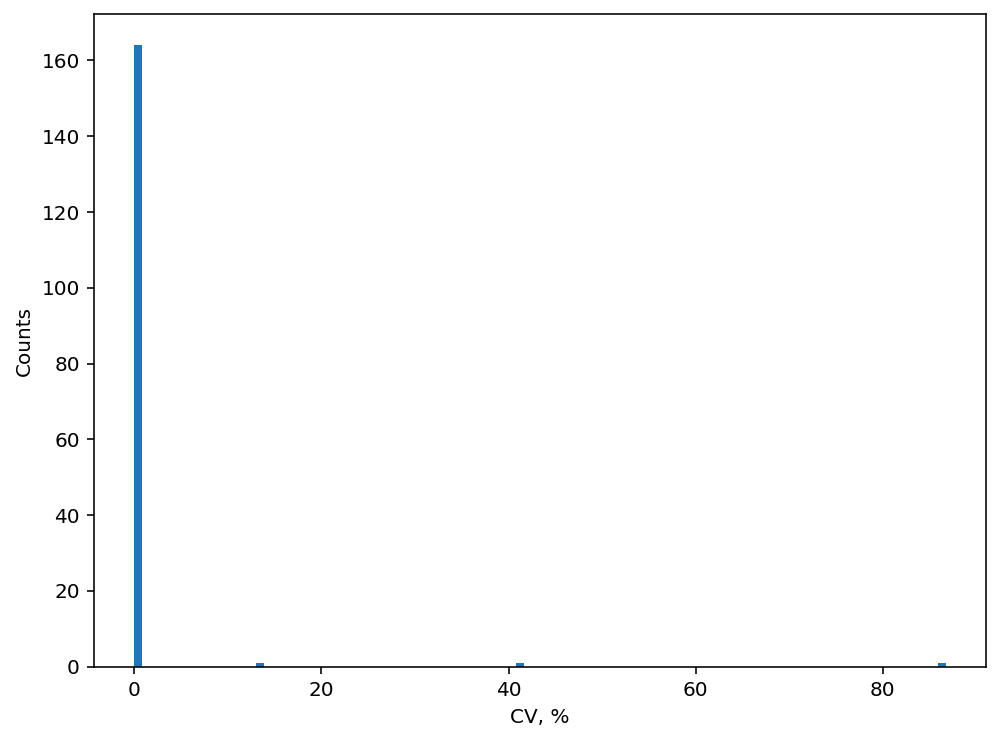

In [15]:
# what are the most variable features?

fig = plt.figure(figsize=(8, 6))

plt.hist(stats['CV'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('CV, %')

plt.grid(False)

plt.show()

#fig.savefig('plots/CV_within_4nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/CV_within_4nov2020.svg', transparent=True)


In [16]:
stats.loc[stats['CV']>50] # i.e. > 50%

index      mean    median   Std.Dev       Var         CV
27  with_met_ATP_n  0.440461  0.322722  0.382038  0.145953  86.735941

In [17]:
um_all.head()

c_gid  mpi_rank  idxm  with_met_VNeu0  with_met_m0  with_met_h0  \
0  157878.0       222     0           -73.0      0.00541       0.9002   
1  162105.0       227     0           -73.0      0.00541       0.9002   
2  162034.0       226     0           -73.0      0.00541       0.9002   
3  160073.0       223     0           -73.0      0.00541       0.9002   
4  157286.0       221     0           -73.0      0.00541       0.9002   

   with_met_n0  with_met_Conc_Cl_out  with_met_Conc_Cl_in  with_met_Na0in  \
0       0.1558                 130.0                  7.0         11.5604   
1       0.1558                 130.0                  7.0         11.5604   
2       0.1558                 130.0                  7.0         11.5604   
3       0.1558                 130.0                  7.0         11.5604   
4       0.1558                 130.0                  7.0         11.5604   

   with_met_K0out  with_met_Glc_b  with_met_Lac_b  with_met_O2_b  with_met_q  \
0             4.1            4.51            1.24            7.3      0.0067   
1             4.1            4.51            1.24            7.3      0.0067   
2             4.1            4.51            1.24            7.3      0.0067   
3             4.1            4.51            1.24            7.3      0.0067   
4             4.1            4.51            1.24            7.3      0.0067   

   with_met_Glc_ecs  with_met_Lac_ecs  with_met_O2_ecs  with_met_O2_n  \
0              1.25               1.2             0.04           0.03   
1              1.25               1.2             0.04           0.03   
2              1.25               1.2             0.04           0.03   
3              1.25               1.2             0.04           0.03   
4              1.25               1.2             0.04           0.03   

   with_met_O2_a  with_met_Glc_n  with_met_Glc_a  with_met_Lac_n  \
0           0.03            1.19             1.2             1.2   
1           0.03            1.19             1.2             1.2   
2           0.03            1.19             1.2             1.2   
3           0.03            1.19             1.2             1.2   
4           0.03            1.19             1.2             1.2   

   with_met_Lac_a  with_met_Pyr_n  with_met_Pyr_a  with_met_PCr_n  \
0             1.2             0.3            0.04           10.33   
1             1.2             0.3            0.04           10.33   
2             1.2             0.3            0.04           10.33   
3             1.2             0.3            0.04           10.33   
4             1.2             0.3            0.04           10.33   

   with_met_PCr_a  with_met_Cr_n  with_met_Cr_a  with_met_ATP_n  \
0           10.32         0.0003         0.0011        1.188076   
1           10.32         0.0003         0.0011        0.217888   
2           10.32         0.0003         0.0011        0.890735   
3           10.32         0.0003         0.0011        0.793650   
4           10.32         0.0003         0.0011        0.533623   

   with_met_ATP_a  with_met_ADP_n  with_met_ADP_a  with_met_NADH_n  \
0             1.4        0.241957            0.03           0.0007   
1             1.4        1.231025            0.03           0.0007   
2             1.4        0.539490            0.03           0.0007   
3             1.4        0.636719            0.03           0.0007   
4             1.4        0.898803            0.03           0.0007   

   with_met_NADH_a  with_met_NAD_n  with_met_NAD_a  with_met_ksi  \
0           0.0007             0.5             0.5          0.06   
1           0.0007             0.5             0.5          0.06   
2           0.0007             0.5             0.5          0.06   
3           0.0007             0.5             0.5          0.06   
4           0.0007             0.5             0.5          0.06   

   with_met_ksi_ephys  with_met_G6P_n  with_met_F6P_n  with_met_G6P_a  \
0                0.06            0.15            0.01 

In [18]:
um_all.columns[[168,169]]

Index(['with_met_GABA_inh_n', 'with_met_Vv'], dtype='object')

In [ ]:
um_all['diff_Na0in'] = um_all['with_met_Na0in'] - um_all['no_met_Na0in']

um_all['diff_K0out'] = um_all['with_met_K0out'] - um_all['no_met_K0out']

In [ ]:
um_all['diff_ATP_n'] = um_all['with_met_ATP_n'] - um_all['no_met_ATP_n']

In [21]:
um_all['diff_ADP_n'] = um_all['with_met_ADP_n'] - um_all['no_met_ADP_n']

In [22]:
np.max(um_all['diff_ATP_n'])

0.04080277836940982

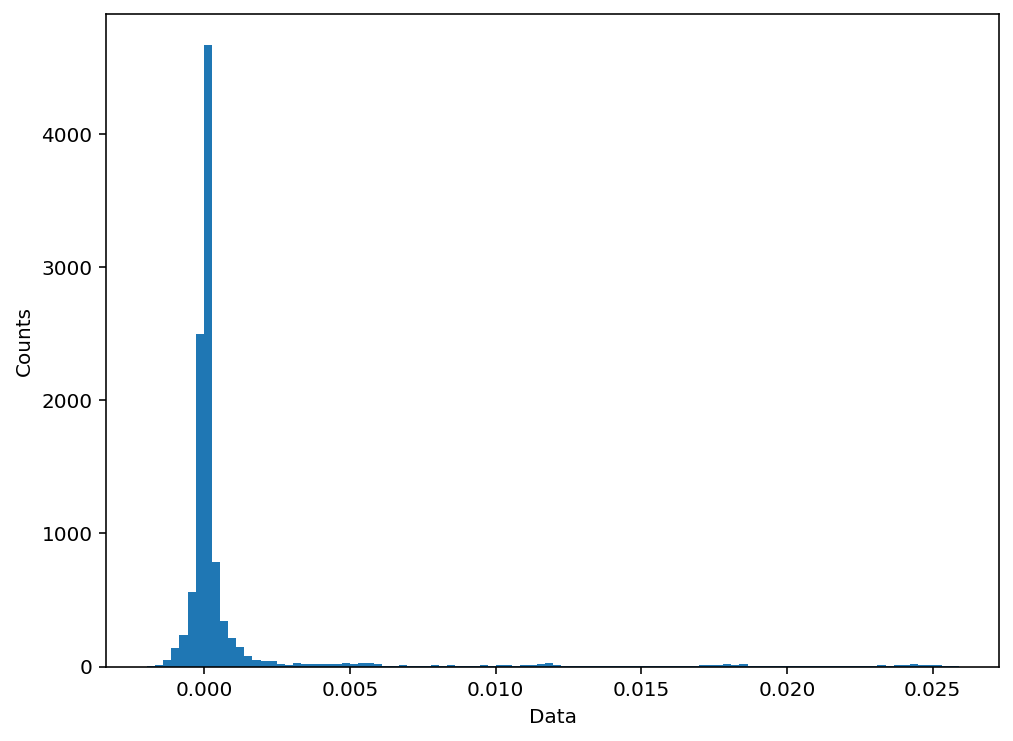

In [88]:

fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_K0out'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

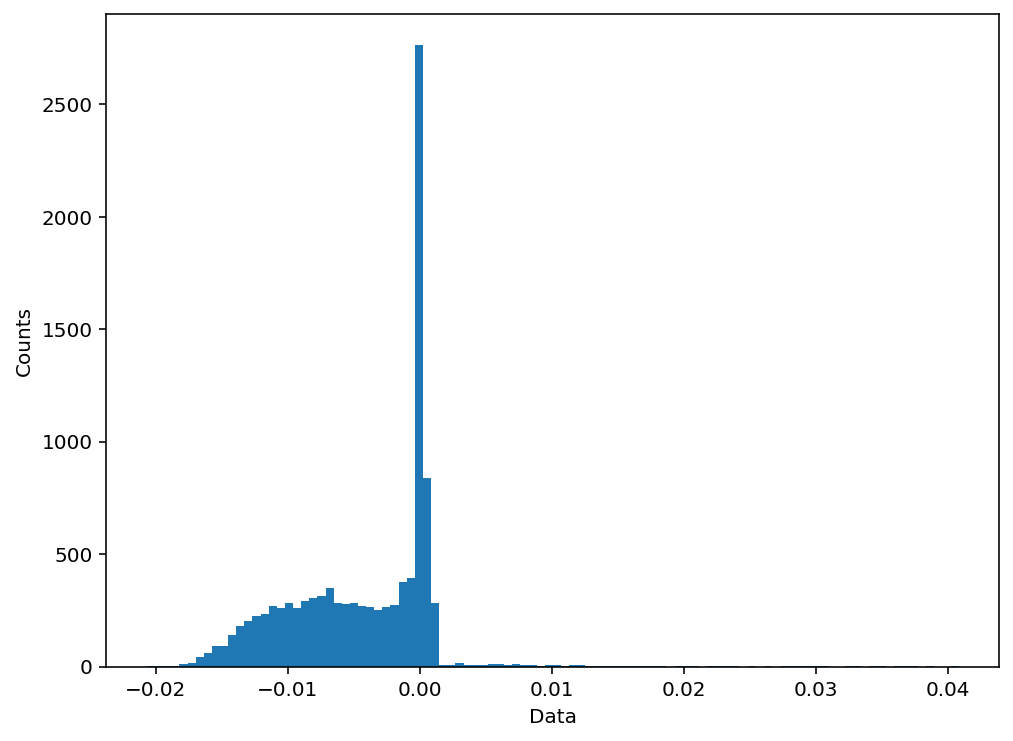

In [91]:
fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_ATP_n'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

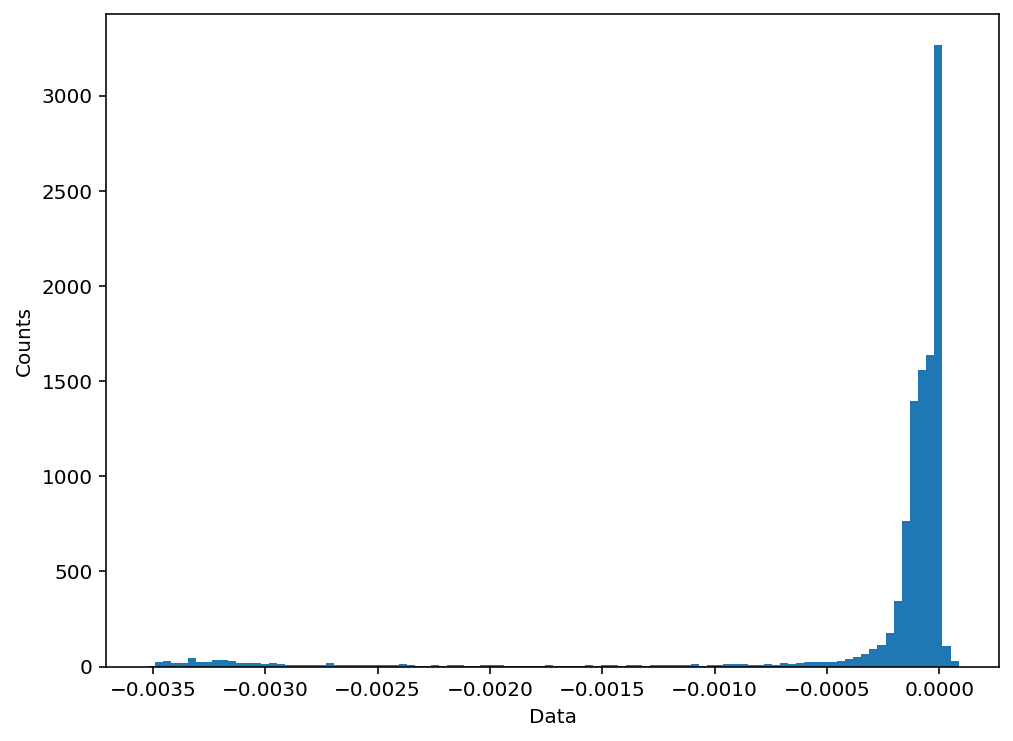

In [93]:
fig = plt.figure(figsize=(8, 6))

plt.hist(um_all['diff_ADP_n'], density=False, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('Data')

plt.grid(False)

plt.show()

### To plot properties by layers

In [ ]:
# need to run from command line: module load py-bluepy 

In [12]:
from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

In [13]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [14]:
l5tpca = c.cells.get({'$target': 'mc2_Column',Cell.MTYPE:'L5_TPC:A'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

l5mc = c.cells.get({'$target': 'mc2_Column',Cell.MTYPE:'L5_MC'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [15]:
l1 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L1'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l2 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L2'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l3 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L3'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l4 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L4'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l5 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L5'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])
l6 = c.cells.get({'$target': 'mc2_Column', Cell.REGION: 'L6'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.ETYPE,Cell.MTYPE,Cell.ME_COMBO])

In [16]:
EXC_mc2ids = c.cells.ids({'$target': 'mc2_Column',  Cell.SYNAPSE_CLASS: "EXC"})
INH_mc2ids = c.cells.ids({'$target': 'mc2_Column',  Cell.SYNAPSE_CLASS: "INH"})

In [17]:
onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/mc2_onepercent_allLayers_EXCandINH_gids.txt")

onepercent = mc2_cells.loc[onepercent_gids,:]

In [18]:
# 10% gids

EXC_L1_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 1, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L2_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 2, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L3_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 3, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L4_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 4, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L5_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 5, Cell.SYNAPSE_CLASS: "EXC"})
EXC_L6_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 6, Cell.SYNAPSE_CLASS: "EXC"})

INH_L1_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 1, Cell.SYNAPSE_CLASS: "INH"})
INH_L2_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 2, Cell.SYNAPSE_CLASS: "INH"})
INH_L3_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 3, Cell.SYNAPSE_CLASS: "INH"})
INH_L4_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 4, Cell.SYNAPSE_CLASS: "INH"})
INH_L5_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 5, Cell.SYNAPSE_CLASS: "INH"})
INH_L6_mc2ids = c.cells.ids({'$target': 'mc2_Column', Cell.LAYER: 6, Cell.SYNAPSE_CLASS: "INH"})


import random

#10% of cells

EXC_L2_mc2ids_10percent = random.sample(list(EXC_L2_mc2ids), round(0.1*len(EXC_L2_mc2ids)) )
EXC_L3_mc2ids_10percent = random.sample(list(EXC_L3_mc2ids), round(0.1*len(EXC_L3_mc2ids)) )
EXC_L4_mc2ids_10percent = random.sample(list(EXC_L4_mc2ids), round(0.1*len(EXC_L4_mc2ids)) )
EXC_L5_mc2ids_10percent = random.sample(list(EXC_L5_mc2ids), round(0.1*len(EXC_L5_mc2ids)) )
EXC_L6_mc2ids_10percent = random.sample(list(EXC_L6_mc2ids), round(0.1*len(EXC_L6_mc2ids)) )

INH_L1_mc2ids_10percent = random.sample(list(INH_L1_mc2ids), round(0.2*len(INH_L1_mc2ids)) ) # because no exc in L1 mc2
INH_L2_mc2ids_10percent = random.sample(list(INH_L2_mc2ids), round(0.1*len(INH_L2_mc2ids)) )
INH_L3_mc2ids_10percent = random.sample(list(INH_L3_mc2ids), round(0.1*len(INH_L3_mc2ids)) )
INH_L4_mc2ids_10percent = random.sample(list(INH_L4_mc2ids), round(0.1*len(INH_L4_mc2ids)) )
INH_L5_mc2ids_10percent = random.sample(list(INH_L5_mc2ids), round(0.1*len(INH_L5_mc2ids)) )
INH_L6_mc2ids_10percent = random.sample(list(INH_L6_mc2ids), round(0.1*len(INH_L6_mc2ids)) )



cells_10percent = []

cells_10percent.extend(EXC_L2_mc2ids_10percent)
cells_10percent.extend(EXC_L3_mc2ids_10percent)
cells_10percent.extend(EXC_L4_mc2ids_10percent)
cells_10percent.extend(EXC_L5_mc2ids_10percent)
cells_10percent.extend(EXC_L6_mc2ids_10percent)

cells_10percent.extend(INH_L1_mc2ids_10percent)
cells_10percent.extend(INH_L2_mc2ids_10percent)
cells_10percent.extend(INH_L3_mc2ids_10percent)
cells_10percent.extend(INH_L4_mc2ids_10percent)
cells_10percent.extend(INH_L5_mc2ids_10percent)
cells_10percent.extend(INH_L6_mc2ids_10percent)




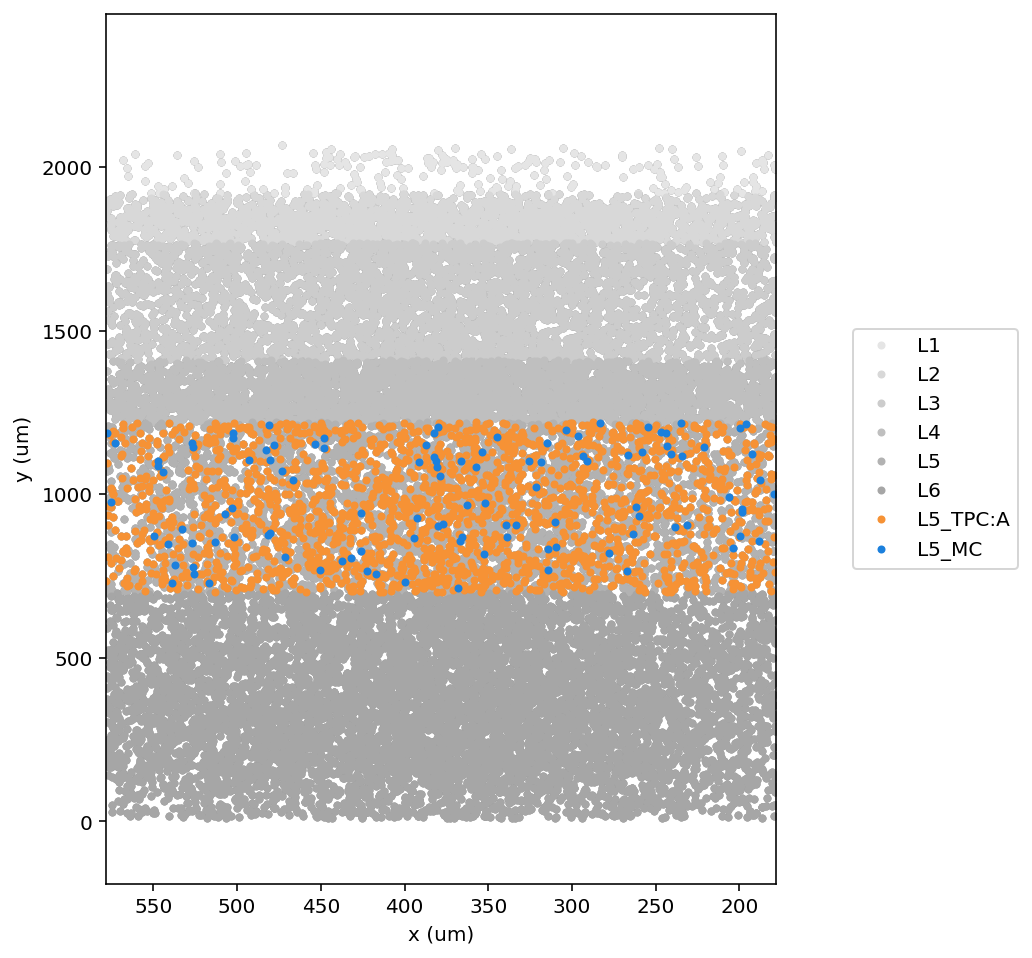

In [137]:
fig = plt.figure(figsize=(6, 8))

ax = fig.add_subplot()

ax = plt.plot(mc2_cells[Cell.X], mc2_cells[Cell.Y], '.', color='gray', label='') 

x_min = mc2_cells[Cell.X].max()
x_max = mc2_cells[Cell.X].min()

y_min = mc2_cells[Cell.Y].min() 
y_max = mc2_cells[Cell.Y].max()


ax = plt.plot(l1[Cell.X], l1[Cell.Y], '.', color='#e5e5e5', label='L1')
ax = plt.plot(l2[Cell.X], l2[Cell.Y], '.', color='#d8d8d8', label='L2')
ax = plt.plot(l3[Cell.X], l3[Cell.Y], '.', color='#cccccc', label='L3')
ax = plt.plot(l4[Cell.X], l4[Cell.Y], '.', color='#bfbfbf', label='L4')
ax = plt.plot(l5[Cell.X], l5[Cell.Y], '.', color='#b2b2b2', label='L5')
ax = plt.plot(l6[Cell.X], l6[Cell.Y], '.', color='#a6a6a6', label='L6') 



ax = plt.plot(l5tpca[Cell.X], l5tpca[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
ax = plt.plot(l5mc[Cell.X], l5mc[Cell.Y], '.', color='#1b80dd', label='L5_MC') 



plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+400])

plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))


plt.show()

#fig.savefig('plots/layers_cells_overview_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
#fig.savefig('plots/layers_cells_overview_18aug2020.svg', transparent=True)


In [18]:
um_all.index = um_all['c_gid']

In [19]:
um_all = um_all.drop(columns='c_gid')

In [20]:
um_all.head()

mpi_rank  idxm  with_met_VNeu0  with_met_m0  with_met_h0  \
c_gid                                                               
2318.0        326     0           -73.0      0.00541       0.9002   
5309.0        748     0           -73.0      0.00541       0.9002   
11.0            3     0           -73.0      0.00541       0.9002   
4956.0        706     0           -73.0      0.00541       0.9002   
12488.0      1776     0           -73.0      0.00541       0.9002   

         with_met_n0  with_met_Conc_Cl_out  with_met_Conc_Cl_in  \
c_gid                                                             
2318.0        0.1558                 140.0                  8.0   
5309.0        0.1558                 140.0                  8.0   
11.0          0.1558                 140.0                  8.0   
4956.0        0.1558                 140.0                  8.0   
12488.0       0.1558                 140.0                  8.0   

         with_met_Na0in  with_met_K0out  with_met_Glc_b  with_met_Lac_b  \
c_gid                                                                     
2318.0          11.5604        6.139331        4.489656        1.259148   
5309.0          11.5604        6.256436        4.489663        1.259092   
11.0            11.5604        6.232913        4.489664        1.259082   
4956.0          11.5604        6.251926        4.489664        1.259078   
12488.0         11.5604        6.219984        4.489662        1.259080   

         with_met_O2_b  with_met_q  with_met_Glc_ecs  with_met_Lac_ecs  \
c_gid                                                                    
2318.0        6.605004      0.0067          1.144932          1.406433   
5309.0        6.604986      0.0067          1.145217          1.406098   
11.0          6.604980      0.0067          1.145262          1.406057   
4956.0        6.604985      0.0067          1.145273          1.406021   
12488.0       6.605015      0.0067          1.145188          1.406028   

         with_met_O2_ecs  with_met_O2_n  with_met_O2_a  with_met_Glc_n  \
c_gid                                                                    
2318.0          0.032228       0.007975       0.021495        1.143605   
5309.0          0.032211       0.007981       0.021436        1.143903   
11.0            0.032205       0.007981       0.021420        1.143950   
4956.0          0.032210       0.007983       0.021431        1.143962   
12488.0         0.032238       0.007986       0.021506        1.143872   

         with_met_Glc_a  with_met_Lac_n  with_met_Lac_a  with_met_Pyr_n  \
c_gid                                                                     
2318.0         0.649203        1.413596        1.403645        0.242411   
5309.0         0.649085        1.413198        1.403350        0.242525   
11.0           0.649052        1.413151        1.403315        0.242539   
4956.0         0.649074        1.413112        1.403280        0.242549   
12488.0        0.649220        1.413143        1.403262        0.242538   

         with_met_Pyr_a  with_met_PCr_n  with_met_PCr_a  with_met_Cr_n  \
c_gid                                                                    
2318.0         0.340539       10.159320       10.319683       0.170980   
5309.0         0.340403       10.193043       10.319661       0.137257   
11.0           0.340364       10.195216       10.319655       0.135084   
4956.0         0.340389       10.197177       10.319659       0.133123   
12488.0        0.340555       10.188651       10.319685       0.141649   

         with_met_Cr_a       with_met_ATP_n  with_met_ATP_a  \
c_gid                                                         
2318.0        0.001417   0.5679337548370982        1.392133   
5309.0        0.001439   0.6239789277668072        1.391809   
11.0          0.001445   0.6271570797874437        1.391727   
4956.0        0.001441   0.6279898364724348        1.391780   
12488.0       0.001415   0.6029726290507487        1.392162   

    

In [39]:
param.head()

c_gid  rank  idxm   ina_density  const_ksi  voltages_per_gids  nais_mean  \
0   3459   490     0 -1.891475e-19       0.06              -80.0       10.0   
1   7927  1147     0  2.822264e-19       0.06              -80.0       10.0   
2  11573  1646     0  5.722932e-19       0.06              -80.0       10.0   
3  11717  1670     0  7.067203e-19       0.06              -80.0       10.0   
4  11317  1607     0  1.493652e-18       0.06              -80.0       10.0   

   kis_mean    ik_density  const41  pAKTPFK2  atpi_mean  atp_vm27  cais_mean  \
0     140.0 -1.292056e-15      4.1      0.17   2.070183      2.18    0.00005   
1     140.0 -1.049732e-15      4.1      0.17   2.030009      2.18    0.00005   
2     140.0 -7.068836e-16      4.1      0.17   2.097569      2.18    0.00005   
3     140.0 -1.640288e-15      4.1      0.17   2.049325      2.18    0.00005   
4     140.0 -1.400033e-15      4.1      0.17   2.052123      2.18    0.00005   

   mito_scale  glutamatergic_gaba_scaling  outs_r_to_met  cells_volumes_um3  
0    0.826873                         0.1            0.0        3250.741082  
1    0.826873                         0.1            0.0        3190.273213  
2    0.826873                         0.1            0.0        4934.619986  
3    0.826873                         0.1            0.0        3333.922356  
4    0.826873                         0.1            0.0        3189.034505

In [40]:
param.index = param['c_gid']
param = param.drop(columns='c_gid')


In [32]:
#mc2_feat = pd.merge(mc2_cells, um_all, left_index=True,right_index=True, how='inner')

#um.index = um['c_gid']
#um = um.drop(columns='c_gid')

mc2_feat = pd.merge(mc2_cells, um, left_index=True,right_index=True, how='inner')

In [41]:
mc2_feat = pd.merge(mc2_cells, param, left_index=True,right_index=True, how='inner')

In [33]:
mc2_feat["with_met_ATP_n"] = mc2_feat["with_met_ATP_n"].astype(float)

In [42]:
mc2_feat["atpi_mean"] = mc2_feat["atpi_mean"].astype(float)

In [29]:
mc2_feat_u0 = mc2_feat.loc[mc2_feat['idxm']==0].copy()

mc2_feat_u0["with_met_ATP_n"] = 2.2
mc2_feat_u0["idxm"] = -1

mc2_feat = mc2_feat_u0.append(mc2_feat,ignore_index=True)

#mc2_feat = mc2_feat.loc[~mc2_feat['with_met_ATP_n'].isna()]



In [43]:
mc2_feat["ATPconsumed"] = 2.2 - mc2_feat["with_met_ATP_n"]

mc2_feat["ATPconsumed"] = 2.2 - mc2_feat["atpi_mean"]

In [26]:
onepercent_feat = pd.merge(onepercent, um_all, left_index=True,right_index=True, how='inner')

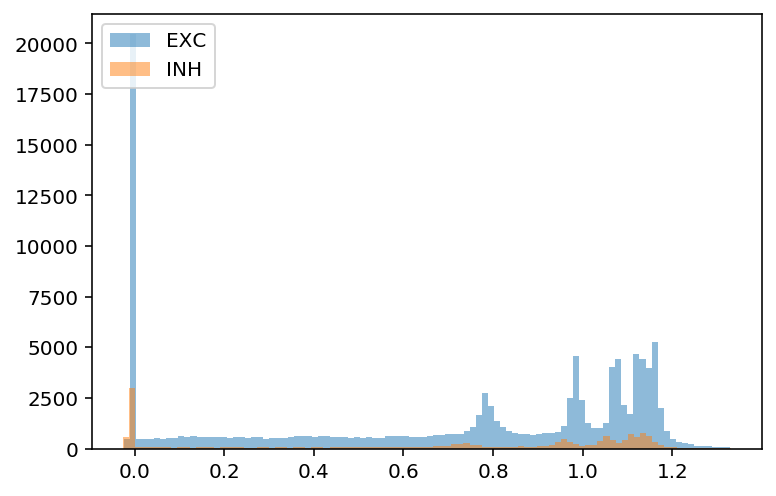

In [27]:
bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(mc2_feat.loc[mc2_feat["synapse_class"]=="EXC","ATPconsumed"], bins, alpha=0.5, label='EXC')
plt.hist(mc2_feat.loc[mc2_feat["synapse_class"]=="INH","ATPconsumed"], bins, alpha=0.5, label='INH')

plt.legend(loc='upper left')
plt.show()

In [31]:
l5mc_feat = pd.merge(l5mc, um_all, left_index=True,right_index=True, how='inner')

In [32]:
len(l5tpca)

2022

In [33]:
len(l5tpca_feat)

10110

In [34]:
l5tpca_feat.loc[147811.0,'diff_ATP_n']

147811    0.000000
147811   -0.004199
147811   -0.006972
147811   -0.009137
147811   -0.011000
Name: diff_ATP_n, dtype: float64

In [62]:
l5tpca_feat.head()

x           y           z  mpi_rank  idxm  with_met_VNeu0  \
147760  321.999232  706.281515  577.108596         0     0           -70.0   
147760  321.999232  706.281515  577.108596         0     1           -70.0   
147760  321.999232  706.281515  577.108596         0     2           -70.0   
147760  321.999232  706.281515  577.108596         0     3           -70.0   
147760  321.999232  706.281515  577.108596         0     4           -70.0   

        with_met_m0  with_met_h0  with_met_n0  with_met_Conc_Cl_out  \
147760     0.008043       0.9002       0.1558                 130.0   
147760     0.008043       0.9002       0.1558                 130.0   
147760     0.008043       0.9002       0.1558                 130.0   
147760     0.008043       0.9002       0.1558                 130.0   
147760     0.008043       0.9002       0.1558                 130.0   

        with_met_Conc_Cl_in  with_met_Na0in  with_met_K0out  with_met_Glc_b  \
147760                  8.0         11.5604        4.120396        4.613824   
147760                  8.0         11.5604        4.140559        4.694480   
147760                  8.0         11.5604        4.160431        4.757143   
147760                  8.0         11.5604        4.180177        4.805826   
147760                  8.0         11.5604        4.199704        4.843646   

        with_met_Lac_b  with_met_O2_b  with_met_q  with_met_Glc_ecs  \
147760        1.212608       7.196083      0.0067          1.242191   
147760        1.192111       7.608173      0.0067          1.239059   
147760        1.176866       7.931863      0.0067          1.236067   
147760        1.165595       8.185177      0.0067          1.233215   
147760        1.157326       8.382758      0.0067          1.230496   

        with_met_Lac_ecs  with_met_O2_ecs  with_met_O2_n  with_met_O2_a  \
147760          1.369631         0.054363       0.048104       0.031280   
147760          1.377442         0.058116       0.054460       0.034798   
147760          1.386269         0.057821       0.055601       0.036581   
147760          1.395402         0.057048       0.055069       0.037100   
147760          1.404659         0.056427       0.054424       0.037218   

        with_met_Glc_n  with_met_Glc_a  with_met_Lac_n  with_met_Lac_a  \
147760        1.241381        1.191796        1.369688        1.372152   
147760        1.238256        1.184522        1.377517        1.380514   
147760        1.235274        1.177958        1.386326        1.389697   
147760        1.232432        1.171934        1.395458        1.399046   
147760        1.229723        1.166339        1.404713        1.408469   

        with_met_Pyr_n  with_met_Pyr_a  with_met_PCr_n  with_met_PCr_a  \
147760        0.295520        0.050633       10.330165       10.319812   
147760        0.291327        0.070015       10.330162       10.319537   
147760        0.287585        0.088920       10.330162       10.319456   
147760        0.283932        0.105682       10.330162       10.319384   
147760        0.280306        0.120491       10.330161       10.319295   

        with_met_Cr_n  with_met_Cr_a  with_met_ATP_n  with_met_ATP_a  \
147760       0.000135       0.001288        1.428806        1.410629   
147760       0.000138       0.001563        1.429493        1.406776   
147760       0.000138       0.001644        1.429513        1.405617   
147760       0.000138       0.001716        1.429580        1.404562   
147760       0.000139       0.001805        1.429642        1.403271   

        with_met_ADP_n  with_met_ADP_a  with_met_NADH_n  with_met_NADH_a  \
147760        0.002022        0.019371         0.000878         0.001767   
147760        0.002062        0.023224         0.000987         0.001511   
147760        0.002063        0.024383         0.001029         0.001318   
147760        0.002069        0.025438         0.001051         0.001209   
147760        0.002078        0.026729         0.001062         0

In [63]:
l5tpca_feat_mean = l5tpca_feat.groupby(l5tpca_feat.index).mean()
l5tpca_feat_mean.head()

x            y           z  mpi_rank  idxm  with_met_VNeu0  \
147760  321.999232   706.281515  577.108596         0     2           -70.0   
147761  517.843059   727.718341  541.055042         1     2           -70.0   
147789  544.045771   769.493658  639.774117         2     2           -70.0   
147792  490.670078   928.125356  619.340420         3     2           -70.0   
147794  315.838227  1037.090485  769.339527         4     2           -70.0   

        with_met_m0  with_met_h0  with_met_n0  with_met_Conc_Cl_out  \
147760     0.008043       0.9002       0.1558                 130.0   
147761     0.008043       0.9002       0.1558                 130.0   
147789     0.008043       0.9002       0.1558                 130.0   
147792     0.008043       0.9002       0.1558                 130.0   
147794     0.008043       0.9002       0.1558                 130.0   

        with_met_Conc_Cl_in  with_met_Na0in  with_met_K0out  with_met_Glc_b  \
147760                  8.0         11.5604        4.160253        4.742984   
147761                  8.0         11.5604        4.160368        4.742984   
147789                  8.0         11.5604        4.160275        4.742984   
147792                  8.0         11.5604        4.160140        4.742984   
147794                  8.0         11.5604        4.160147        4.742984   

        with_met_Lac_b  with_met_O2_b  with_met_q  with_met_Glc_ecs  \
147760        1.180901       7.860811      0.0067          1.236206   
147761        1.180875       7.861266      0.0067          1.236187   
147789        1.180874       7.861289      0.0067          1.236186   
147792        1.180921       7.860342      0.0067          1.236230   
147794        1.180886       7.861074      0.0067          1.236197   

        with_met_Lac_ecs  with_met_O2_ecs  with_met_O2_n  with_met_O2_a  \
147760          1.386681         0.056755       0.053532       0.035396   
147761          1.386054         0.056806       0.053736       0.035451   
147789          1.386021         0.056809       0.053746       0.035454   
147792          1.387176         0.056718       0.053344       0.035345   
147794          1.386315         0.056787       0.053655       0.035430   

        with_met_Glc_n  with_met_Glc_a  with_met_Lac_n  with_met_Lac_a  \
147760        1.235413        1.178510        1.386740        1.389976   
147761        1.235394        1.178509        1.386109        1.389360   
147789        1.235393        1.178509        1.386075        1.389328   
147792        1.235437        1.178510        1.387236        1.390465   
147794        1.235404        1.178510        1.386372        1.389617   

        with_met_Pyr_n  with_met_Pyr_a  with_met_PCr_n  with_met_PCr_a  \
147760        0.287734        0.087148       10.330162       10.319497   
147761        0.287661        0.087148       10.330164       10.319497   
147789        0.287658        0.087148       10.330164       10.319497   
147792        0.288032        0.087148       10.330163       10.319497   
147794        0.287718        0.087148       10.330164       10.319497   

        with_met_Cr_n  with_met_Cr_a  with_met_ATP_n  with_met_ATP_a  \
147760       0.000138       0.001603        1.429407        1.406171   
147761       0.000136       0.001603        1.428920        1.406171   
147789       0.000136       0.001603        1.428877        1.406171   
147792       0.000137       0.001603        1.429055        1.406171   
147794       0.000136       0.001603        1.428875        1.406171   

        with_met_ADP_n  with_met_ADP_a  with_met_NADH_n  with_met_NADH_a  \
147760        0.002059        0.023829         0.001001         0.001389   
147761        0.002037        0.023829         0.001002         0.001389   
147789        0.002036        0.023829         0.001002         0.001389   
147792        0.002054        0.023829         0.000996         0.001390   
147794        0.002041        0.023829         0.001001    

In [65]:
l5mc_feat_mean = l5mc_feat.groupby(l5mc_feat.index).mean()


In [64]:
l5tpca_feat_mean.loc[147811.0,'diff_ATP_n']

-0.006261510016267157

In [56]:
len(l5tpca_feat['diff_ATP_n'].tolist() + l5mc_feat['diff_ATP_n'].tolist())/(len(l5tpca_feat['diff_ATP_n'].tolist()) + len(l5mc_feat['diff_ATP_n'].tolist()))

1.0

In [57]:
np.min(l5tpca_feat['diff_ATP_n'].tolist())

-0.020671364052175623

In [58]:
np.min(l5mc_feat['diff_ATP_n'].tolist())

-0.018521077547003495

In [ ]:
vmin=np.min(l5tpca_feat_mean['diff_ATP_n'].tolist() + l5mc_feat_mean['diff_ATP_n'].tolist())
vmax=np.max(l5tpca_feat_mean['diff_ATP_n'].tolist() + l5mc_feat_mean['diff_ATP_n'].tolist())

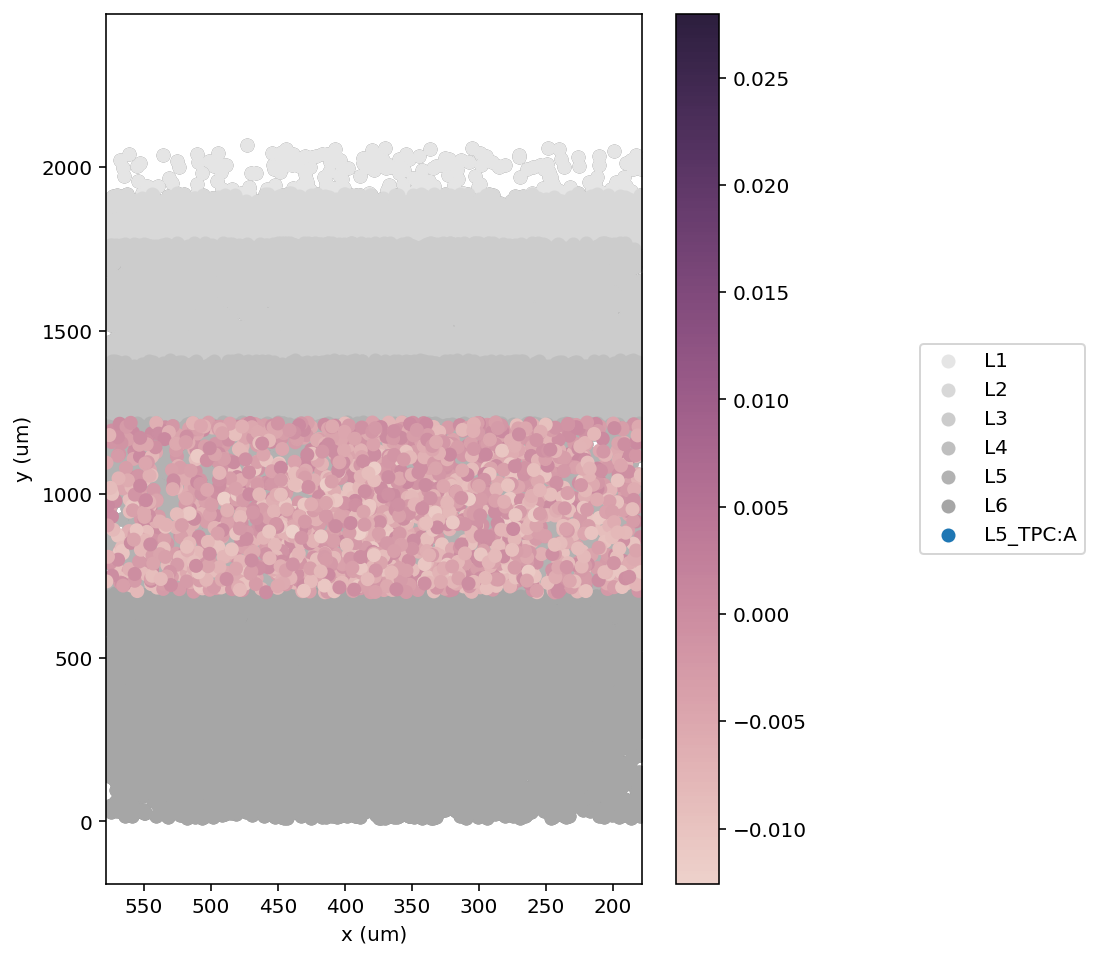

In [67]:

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

ax1 = ax.scatter(mc2_cells[Cell.X], mc2_cells[Cell.Y], color='gray', label='') 

x_min = mc2_cells[Cell.X].max()
x_max = mc2_cells[Cell.X].min()

y_min = mc2_cells[Cell.Y].min() 
y_max = mc2_cells[Cell.Y].max()


ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 



#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(l5tpca_feat_mean[Cell.X], l5tpca_feat_mean[Cell.Y], c=l5tpca_feat_mean['diff_ATP_n'], vmin=vmin, vmax=vmax, cmap=cmap, label='L5_TPC:A')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+400])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

fig.savefig('plots/diffATP_L5TPCA_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
fig.savefig('plots/diffATP_L5TPCA_18aug2020.svg', transparent=True)


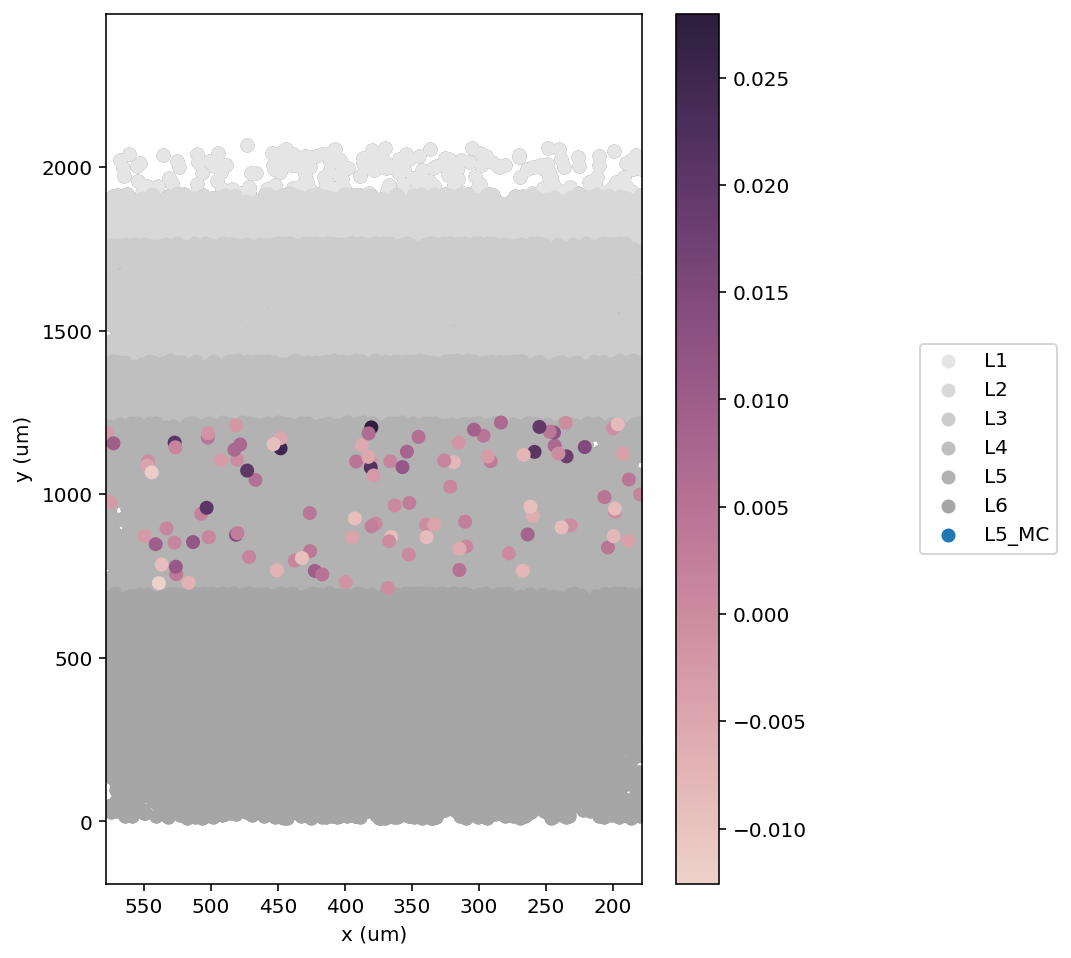

In [69]:

cmap = sns.cubehelix_palette(as_cmap=True)


fig, ax = plt.subplots(figsize=(6, 8))

ax1 = ax.scatter(mc2_cells[Cell.X], mc2_cells[Cell.Y], color='gray', label='') 

x_min = mc2_cells[Cell.X].max()
x_max = mc2_cells[Cell.X].min()

y_min = mc2_cells[Cell.Y].min() 
y_max = mc2_cells[Cell.Y].max()


ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 



#ax = plt.plot(l5tpca_feat[Cell.X], l5tpca_feat[Cell.Y], '.', color='#f69235', label='L5_TPC:A')
#ax = plt.plot(l5mc_feat[Cell.X], l5mc_feat[Cell.Y], '.', color='#1b80dd', label='L5_MC') 

ax2 = ax.scatter(l5mc_feat_mean[Cell.X], l5mc_feat_mean[Cell.Y], c=l5mc_feat_mean['diff_ATP_n'], vmin=vmin, vmax=vmax, cmap=cmap, label='L5_MC')


plt.ylabel('Layer')
plt.ylabel('y (um)')
plt.xlabel('x (um)')

plt.xlim([x_min, x_max])
plt.ylim([y_min-200, y_max+400])

plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

fig.colorbar(ax2)

plt.show()

fig.savefig('plots/diffATP_L5MC_18aug2020.png',dpi=300, bbox_inches='tight', transparent=True)
fig.savefig('plots/diffATP_L5MC_18aug2020.svg', transparent=True)


In [43]:
onepercent_feat.columns

Index(['x', 'y', 'z', 'mpi_rank', 'idxm', 'with_met_VNeu0', 'with_met_m0',
       'with_met_h0', 'with_met_n0', 'with_met_Conc_Cl_out',
       ...
       'with_met_GSSG_n', 'with_met_MitoMembrPotent_a',
       'with_met_MitoMembrPotent_n', 'with_met_GLU_n', 'with_met_NEneuromod',
       'with_met_AMP_n', 'with_met_GLN_n', 'with_met_GABA_inh_n',
       'with_met_Vv', 'with_met_dHb'],
      dtype='object', length=173)

In [ ]:
# plot (Factor_With_Met - Factor_No_Met)/(np.mean(Factor_CV_With_Met,Factor_CV_No_Met)) for all cells


In [63]:
onepercent_feat.head()

x            y           z  mpi_rank  idxm  with_met_VNeu0  \
109.0   568.072782  2023.518930  557.214067         0     0           -73.0   
109.0   568.072782  2023.518930  557.214067         0     1           -73.0   
109.0   568.072782  2023.518930  557.214067         0     2           -73.0   
109.0   568.072782  2023.518930  557.214067         0     3           -73.0   
1262.0  483.753358  1684.888352  602.558669         1     0           -73.0   

        with_met_m0  with_met_h0  with_met_n0  with_met_Conc_Cl_out  \
109.0       0.00541       0.9002       0.1558                 130.0   
109.0       0.00541       0.9002       0.1558                 130.0   
109.0       0.00541       0.9002       0.1558                 130.0   
109.0       0.00541       0.9002       0.1558                 130.0   
1262.0      0.00541       0.9002       0.1558                 130.0   

        with_met_Conc_Cl_in  with_met_Na0in  with_met_K0out  with_met_Glc_b  \
109.0                   7.0         11.5604             4.1            4.51   
109.0                   7.0         11.5604             4.1            4.51   
109.0                   7.0         11.5604             4.1            4.51   
109.0                   7.0         11.5604             4.1            4.51   
1262.0                  7.0         11.5604             4.1            4.51   

        with_met_Lac_b  with_met_O2_b  with_met_q  with_met_Glc_ecs  \
109.0             1.24            7.3      0.0067              1.25   
109.0             1.24            7.3      0.0067              1.25   
109.0             1.24            7.3      0.0067              1.25   
109.0             1.24            7.3      0.0067              1.25   
1262.0            1.24            7.3      0.0067              1.25   

        with_met_Lac_ecs  with_met_O2_ecs  with_met_O2_n  with_met_O2_a  \
109.0                1.2             0.04           0.03           0.03   
109.0                1.2             0.04           0.03           0.03   
109.0                1.2             0.04           0.03           0.03   
109.0                1.2             0.04           0.03           0.03   
1262.0               1.2             0.04           0.03           0.03   

        with_met_Glc_n  with_met_Glc_a  with_met_Lac_n  with_met_Lac_a  \
109.0             1.19             1.2             1.2             1.2   
109.0             1.19             1.2             1.2             1.2   
109.0             1.19             1.2             1.2             1.2   
109.0             1.19             1.2             1.2             1.2   
1262.0            1.19             1.2             1.2             1.2   

        with_met_Pyr_n  with_met_Pyr_a  with_met_PCr_n  with_met_PCr_a  \
109.0              0.3            0.04           10.33           10.32   
109.0              0.3            0.04           10.33           10.32   
109.0              0.3            0.04           10.33           10.32   
109.0              0.3            0.04           10.33           10.32   
1262.0             0.3            0.04           10.33           10.32   

        with_met_Cr_n  with_met_Cr_a  with_met_ATP_n  with_met_ATP_a  \
109.0          0.0003         0.0011        0.737110             1.4   
109.0          0.0003         0.0011        0.259053             1.4   
109.0          0.0003         0.0011        0.078194             1.4   
109.0          0.0003         0.0011        0.058729             1.4   
1262.0         0.0003         0.0011        0.154774             1.4   

        with_met_ADP_n  with_met_ADP_a  with_met_NADH_n  with_met_NADH_a  \
109.0         0.669763            0.03           0.0007           0.0007   
109.0         1.153439            0.03           0.0007           0.0007   
109.0         1.341749            0.03           0.0007           0.0007   
109.0         1.362978            0.03           0.0007           0.0007   
1262.0        1.318276            0.03           0.0007    

In [62]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [28]:
onepercent_feat_u0 = onepercent_feat.loc[onepercent_feat['idxm']==0].copy()

onepercent_feat_u0["with_met_ATP_n"] = 1.4
onepercent_feat_u0["idxm"] = -1

onepercent_feat = onepercent_feat_u0.append(onepercent_feat,ignore_index=True)

In [29]:
list(onepercent_feat['idxm'].unique())

[-1, 0, 1, 2, 3, 4]

In [155]:
!pwd

/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze


In [21]:
mc2_feat.head()

x            y           z synapse_class  mpi_rank  idxm  \
1449  393.973591  1764.094884  777.364726           EXC       202     0   
1449  393.973591  1764.094884  777.364726           EXC       202     1   
1449  393.973591  1764.094884  777.364726           EXC       202     2   
1449  393.973591  1764.094884  777.364726           EXC       202     3   
1449  393.973591  1764.094884  777.364726           EXC       202     4   

      with_met_VNeu0  with_met_m0  with_met_h0  with_met_n0  \
1449           -73.0      0.00541       0.9002       0.1558   
1449           -73.0      0.00541       0.9002       0.1558   
1449           -73.0      0.00541       0.9002       0.1558   
1449           -73.0      0.00541       0.9002       0.1558   
1449           -73.0      0.00541       0.9002       0.1558   

      with_met_Conc_Cl_out  with_met_Conc_Cl_in  with_met_Na0in  \
1449                 130.0                  7.0         11.5604   
1449                 130.0                  7.0         11.5604   
1449                 130.0                  7.0         11.5604   
1449                 130.0                  7.0         11.5604   
1449                 130.0                  7.0         11.5604   

      with_met_K0out  with_met_Glc_b  with_met_Lac_b  with_met_O2_b  \
1449             4.1            4.51            1.24            7.3   
1449             4.1            4.51            1.24            7.3   
1449             4.1            4.51            1.24            7.3   
1449             4.1            4.51            1.24            7.3   
1449             4.1            4.51            1.24            7.3   

      with_met_q  with_met_Glc_ecs  with_met_Lac_ecs  with_met_O2_ecs  \
1449      0.0067              1.25               1.2             0.04   
1449      0.0067              1.25               1.2             0.04   
1449      0.0067              1.25               1.2             0.04   
1449      0.0067              1.25               1.2             0.04   
1449      0.0067              1.25               1.2             0.04   

      with_met_O2_n  with_met_O2_a  with_met_Glc_n  with_met_Glc_a  \
1449           0.03           0.03            1.19             1.2   
1449           0.03           0.03            1.19             1.2   
1449           0.03           0.03            1.19             1.2   
1449           0.03           0.03            1.19             1.2   
1449           0.03           0.03            1.19             1.2   

      with_met_Lac_n  with_met_Lac_a  with_met_Pyr_n  with_met_Pyr_a  \
1449             1.2             1.2             0.3            0.04   
1449             1.2             1.2             0.3            0.04   
1449             1.2             1.2             0.3            0.04   
1449             1.2             1.2             0.3            0.04   
1449             1.2             1.2             0.3            0.04   

      with_met_PCr_n  with_met_PCr_a  with_met_Cr_n  with_met_Cr_a  \
1449           10.33           10.32         0.0003         0.0011   
1449           10.33           10.32         0.0003         0.0011   
1449           10.33           10.32         0.0003         0.0011   
1449           10.33           10.32         0.0003         0.0011   
1449           10.33           10.32         0.0003         0.0011   

      with_met_ATP_n  with_met_ATP_a  with_met_ADP_n  with_met_ADP_a  \
1449        0.051221             1.4        1.649968            0.03   
1449        0.055400             1.4        1.656831            0.03   
1449        0.051400             1.4        1.675811            0.03   
1449        0.051603             1.4        1.674141            0.03   
1449        0.050103             1.4        1.680009            0.03   

      with_met_NADH_n  with_met_NADH_a  with_met_NAD_n  with_met_NAD_a  \
1449           0.0007           0.0007             0.5             0.5   
1449           0.0007           0.0007             0.5      

In [39]:
np.min(mc2_feat['with_met_ATP_n'].tolist()) 

0.0012854630919733826

In [23]:
np.min(mc2_feat['with_met_ATP_n'].tolist())

2.1851784163490136

In [24]:
np.max(mc2_feat['with_met_ATP_n'].tolist())

2.2

In [31]:
len(list(mc2_feat['idxm'].unique()))

101

In [44]:
np.min(mc2_feat['ATPconsumed'].tolist())

0.004279820175698834

In [45]:
np.max(mc2_feat['ATPconsumed'].tolist())

0.8265886085061687

In [61]:
plt.close()

In [ ]:
fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame


vmin=np.min(mc2_feat['ATPconsumed'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(mc2_feat['ATPconsumed'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())

    
ims = []
for i in list(mc2_feat['idxm'].unique()):
    
    fig, ax = plt.subplots(figsize=(6, 8))

    ax1 = ax.scatter(mc2_cells[Cell.X], mc2_cells[Cell.Y], color='gray', label='') 

    x_min = mc2_cells[Cell.X].max()
    x_max = mc2_cells[Cell.X].min()

    y_min = mc2_cells[Cell.Y].min() 
    y_max = mc2_cells[Cell.Y].max()


    ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
    ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
    ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
    ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
    ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
    ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 

    ax2 = ax.scatter(mc2_feat.loc[mc2_feat['idxm']==i,'x'], mc2_feat.loc[mc2_feat['idxm']==i,'y'], c=mc2_feat.loc[mc2_feat['idxm']==i,'ATPconsumed'], vmin=vmin, vmax=vmax, label='Simulated cells') #cmap=cmap, 

    plt.ylabel('Layer')
    plt.ylabel('y (um)')
    plt.xlabel('x (um)')

    plt.xlim([x_min, x_max])
    plt.ylim([y_min-200, y_max+400])

    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

    fig.colorbar(ax2)
    
    
    
    im = fig #plt.imshow(fig)
    ims.append([im])

    #fig.savefig(f'plots/mc2_ATP_{i}_17nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    #fig.savefig(f'plots/mc2_ATPfullnostim_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    #fig.savefig(f'plots/mc2_ATPgenThalam_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    #fig.savefig(f'plots/mc2_ATPgenNostim_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    #fig.savefig(f'plots/mc2_ATPgenOnePulse_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    fig.savefig(f'plots/movie_lin1/mc2_ATPgenLin1_{i}_22feb2021.png',dpi=150, bbox_inches='tight', transparent=False)
    
    

In [70]:
plt.close('all')

In [68]:
print("done")

done


In [69]:
! pwd

/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/analysis/sim_analyze


<Figure size 432x288 with 0 Axes>

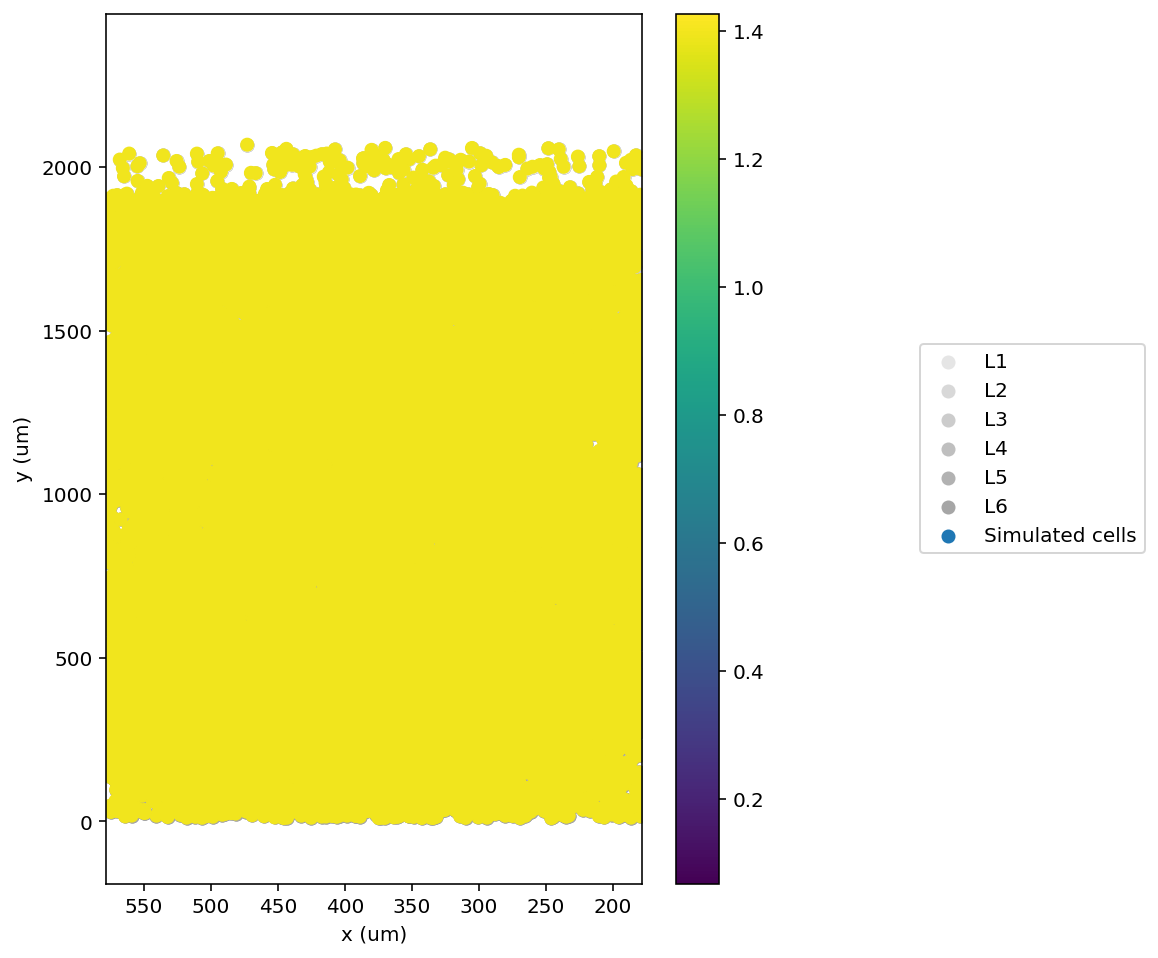

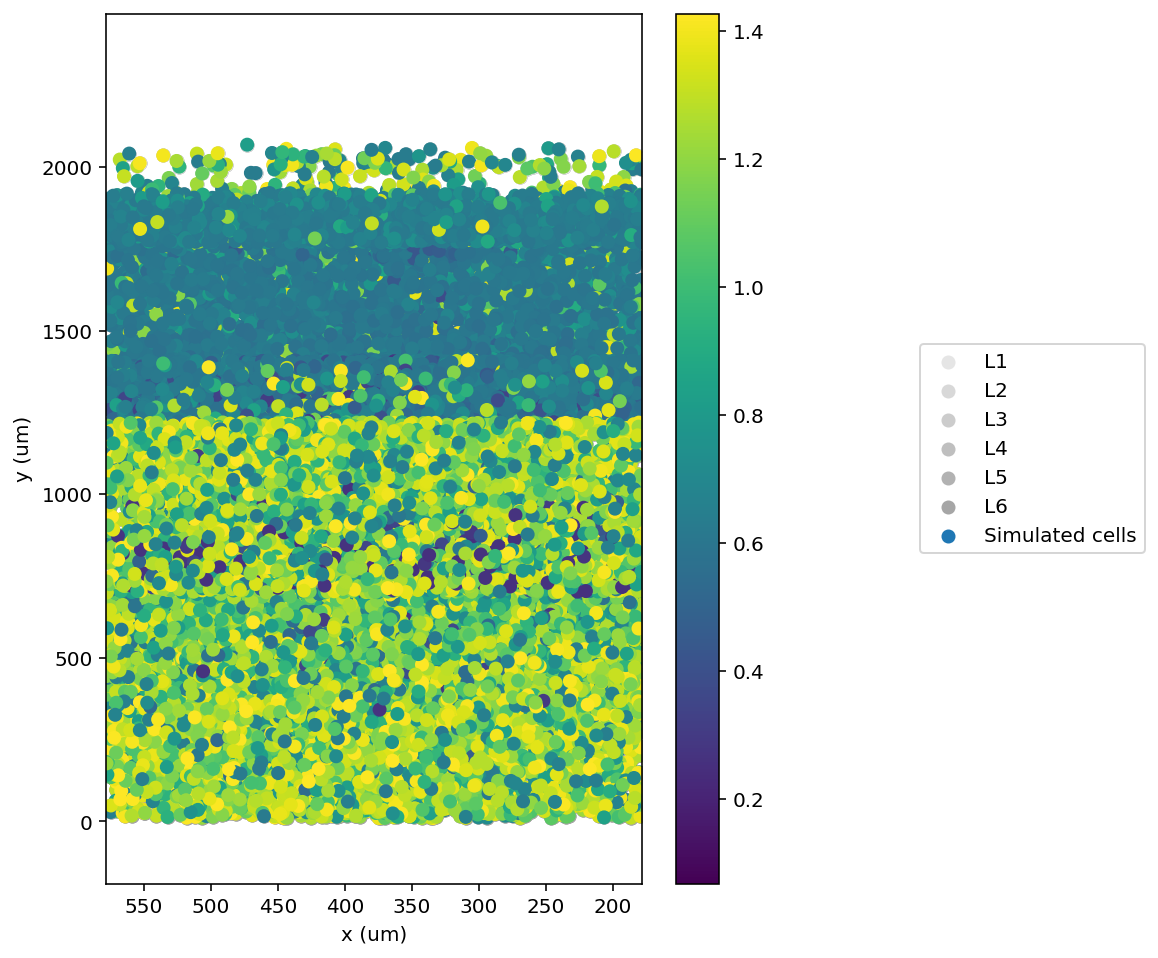

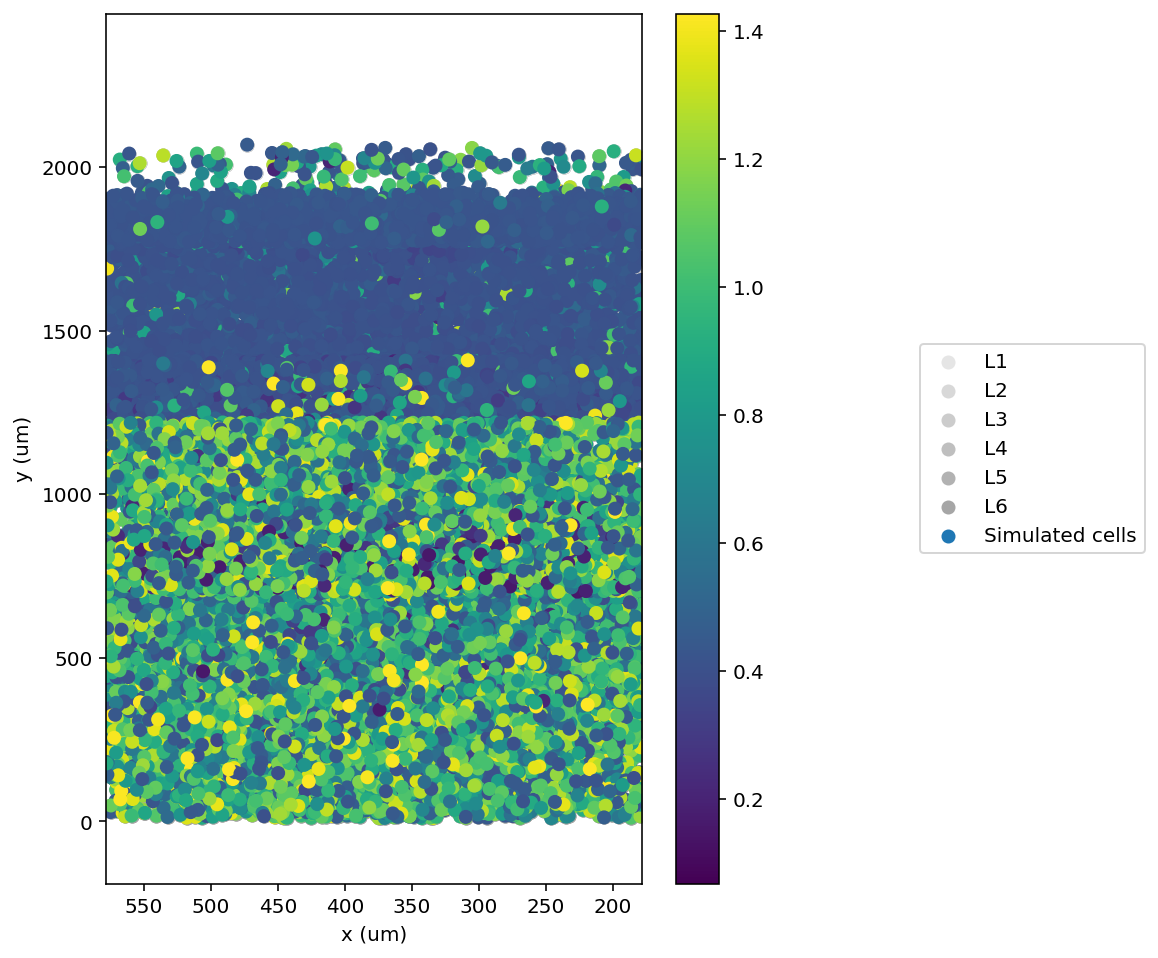

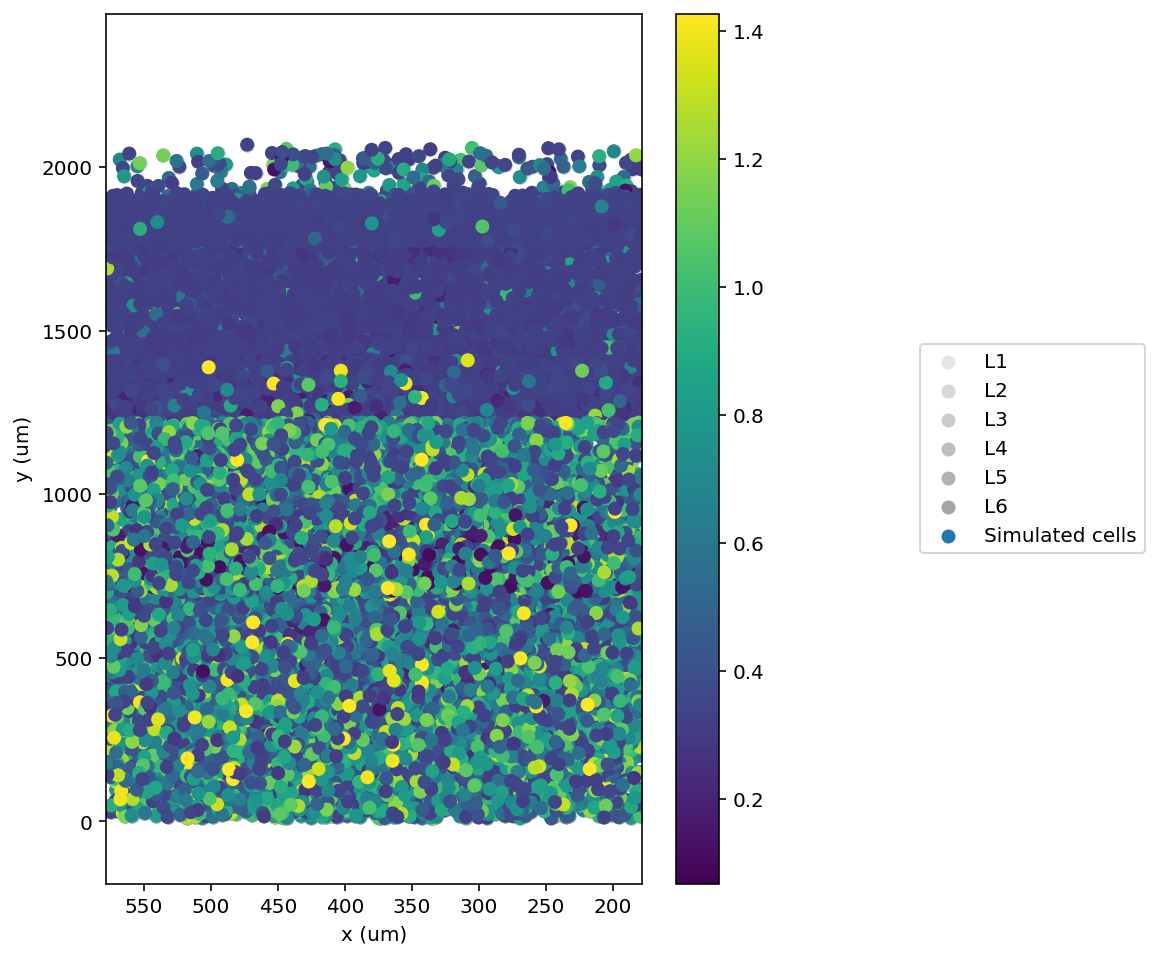

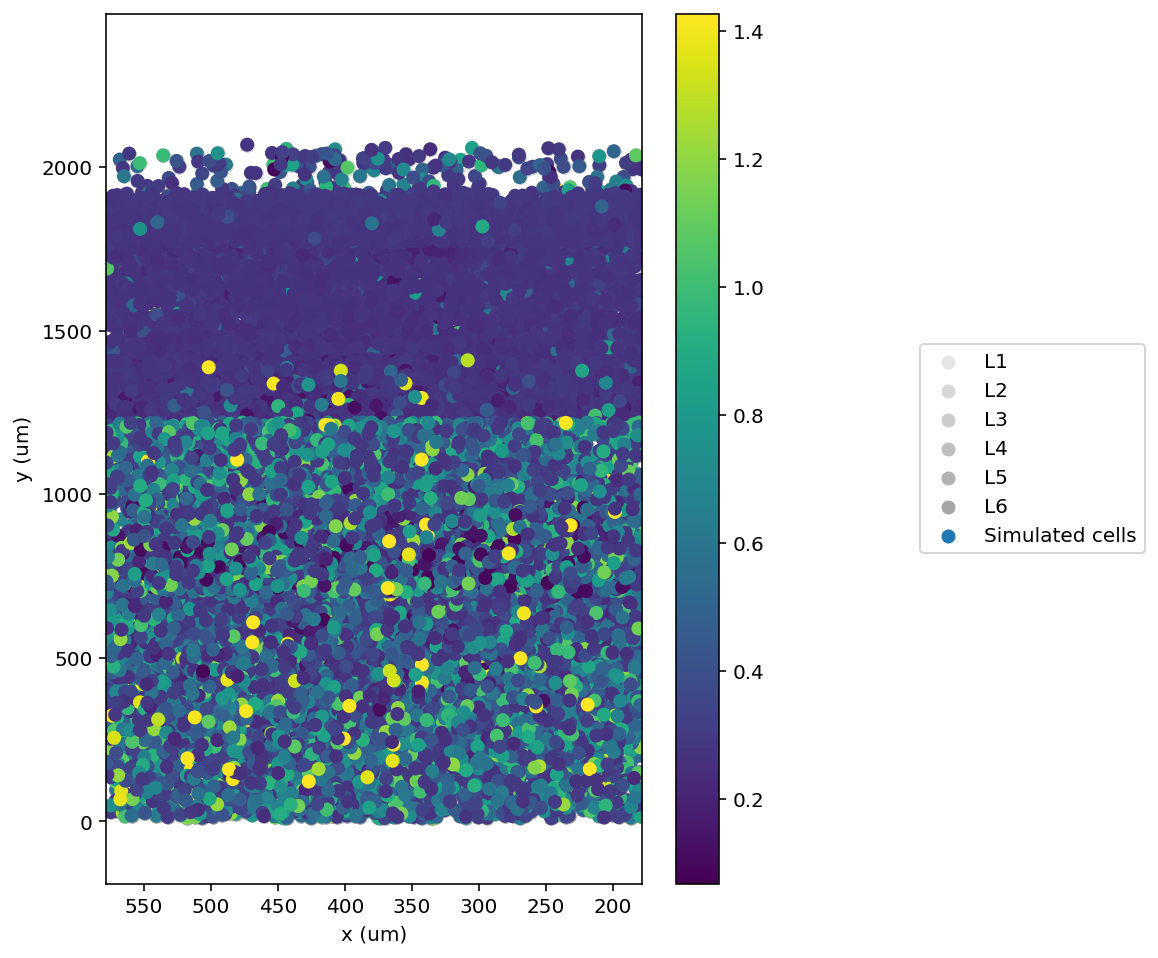

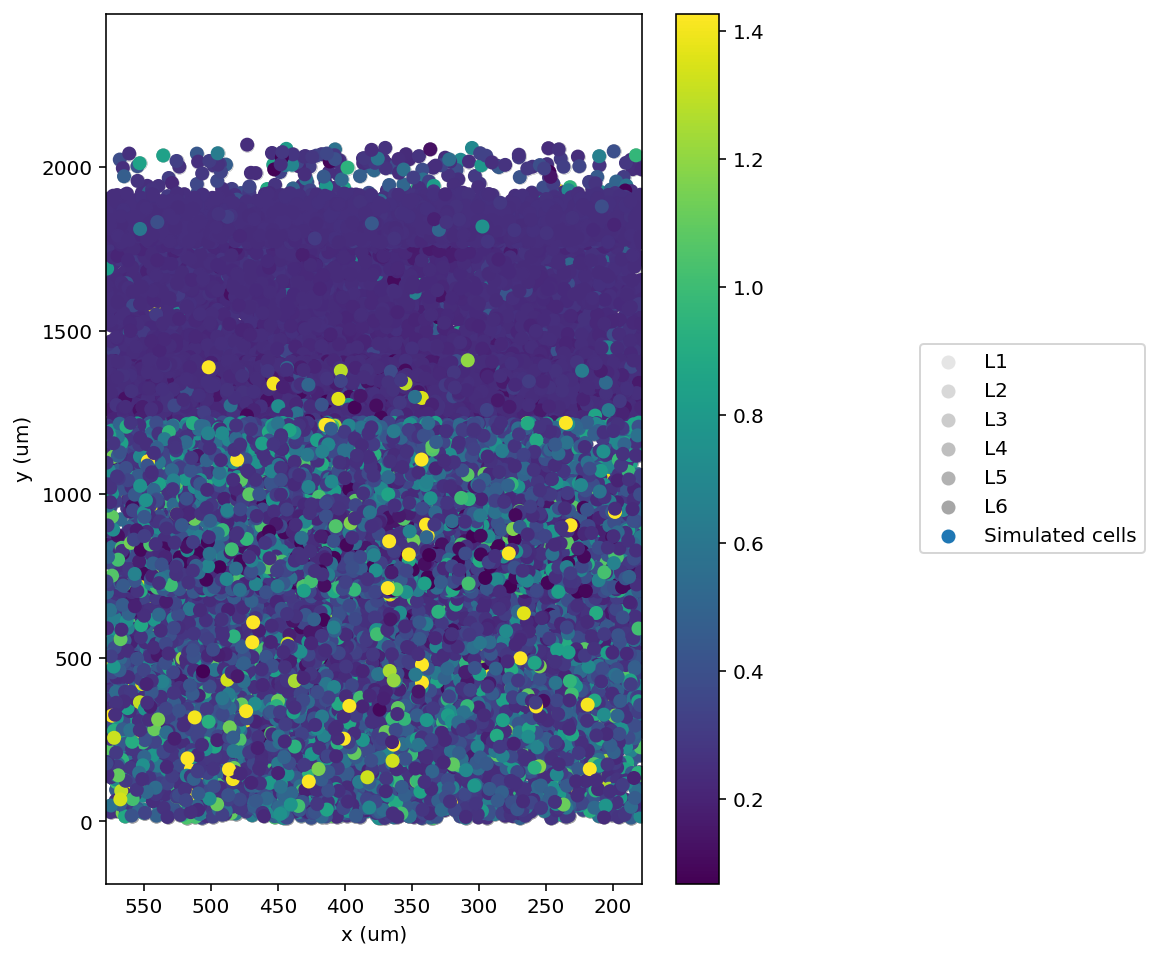

In [30]:
fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame


vmin=np.min(mc2_feat['with_met_ATP_n'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(mc2_feat['with_met_ATP_n'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())

    
ims = []
for i in list(mc2_feat['idxm'].unique()):
    
    fig, ax = plt.subplots(figsize=(6, 8))

    ax1 = ax.scatter(mc2_cells[Cell.X], mc2_cells[Cell.Y], color='gray', label='') 

    x_min = mc2_cells[Cell.X].max()
    x_max = mc2_cells[Cell.X].min()

    y_min = mc2_cells[Cell.Y].min() 
    y_max = mc2_cells[Cell.Y].max()


    ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
    ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
    ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
    ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
    ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
    ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 

    ax2 = ax.scatter(mc2_feat.loc[mc2_feat['idxm']==i,'x'], mc2_feat.loc[mc2_feat['idxm']==i,'y'], c=mc2_feat.loc[mc2_feat['idxm']==i,'with_met_ATP_n'], vmin=vmin, vmax=vmax, label='Simulated cells') #cmap=cmap, 

    plt.ylabel('Layer')
    plt.ylabel('y (um)')
    plt.xlabel('x (um)')

    plt.xlim([x_min, x_max])
    plt.ylim([y_min-200, y_max+400])

    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

    fig.colorbar(ax2)
    
    
    
    im = fig #plt.imshow(fig)
    ims.append([im])

    #fig.savefig(f'plots/mc2_ATP_{i}_17nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    #fig.savefig(f'plots/mc2_ATPfullnostim_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    #fig.savefig(f'plots/mc2_ATPgenThalam_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    #fig.savefig(f'plots/mc2_ATPgenNostim_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    #fig.savefig(f'plots/mc2_ATPgenOnePulse_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    
    #fig.savefig(f'plots/mc2_ATPgenLin1_{i}_22feb2021.png',dpi=300, bbox_inches='tight', transparent=True)
    
    

In [30]:
!ls /gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgen*

/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_0_23nov2020.png
/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_-1_23nov2020.png
/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_1_23nov2020.png
/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_2_23nov2020.png
/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_3_23nov2020.png
/gpfs/bbp.cscs.ch/home/shichkov/sim_analyze/plots/mc2_ATPgenThalam_4_23nov2020.png


<Figure size 432x288 with 0 Axes>

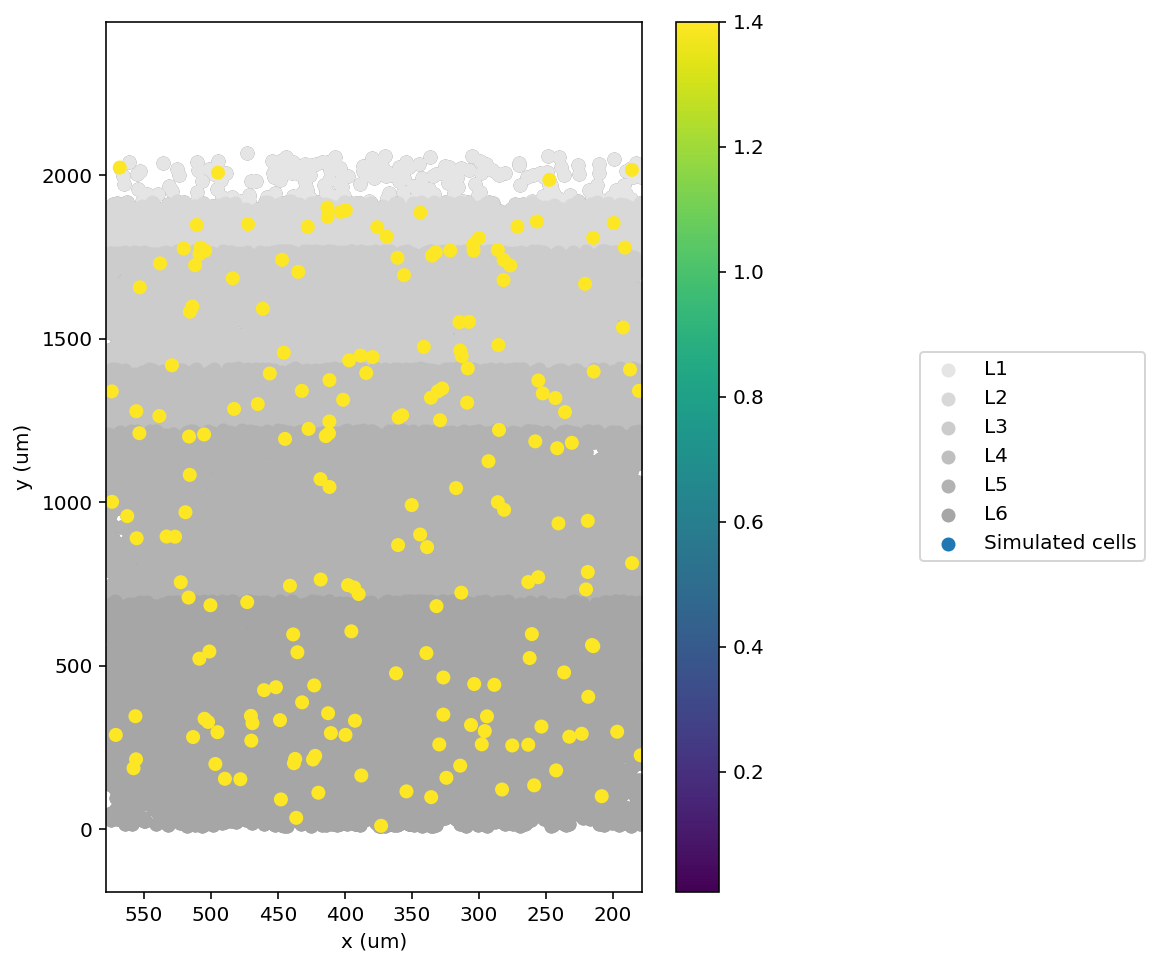

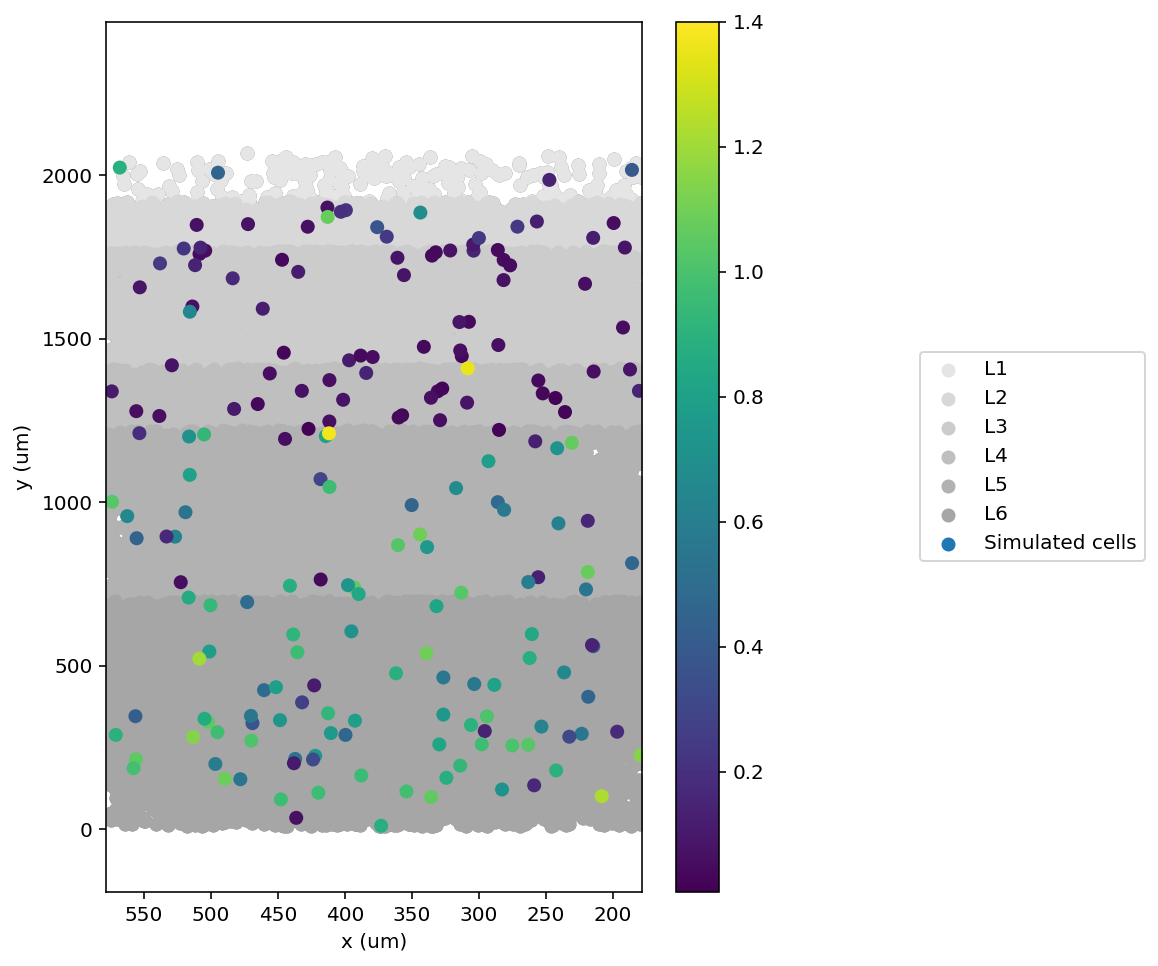

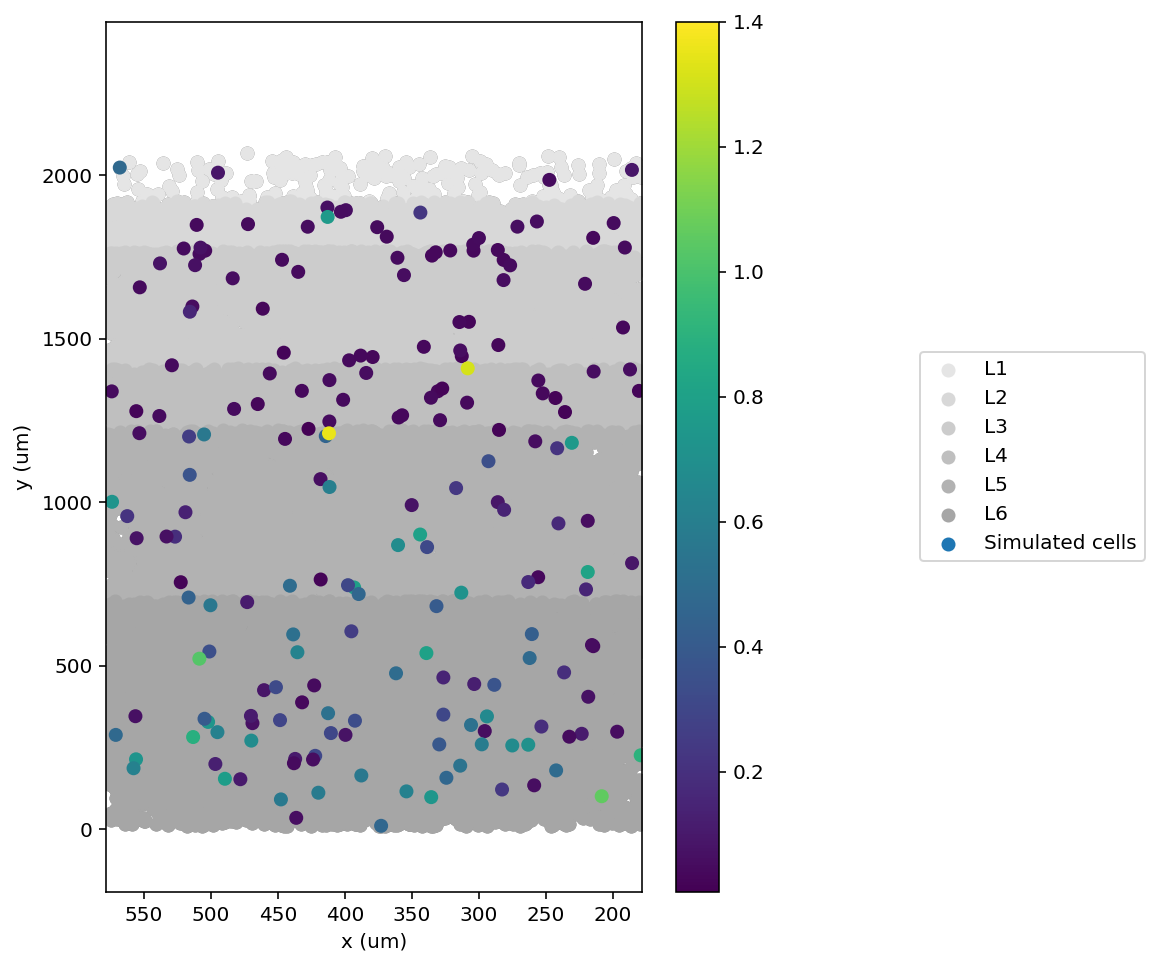

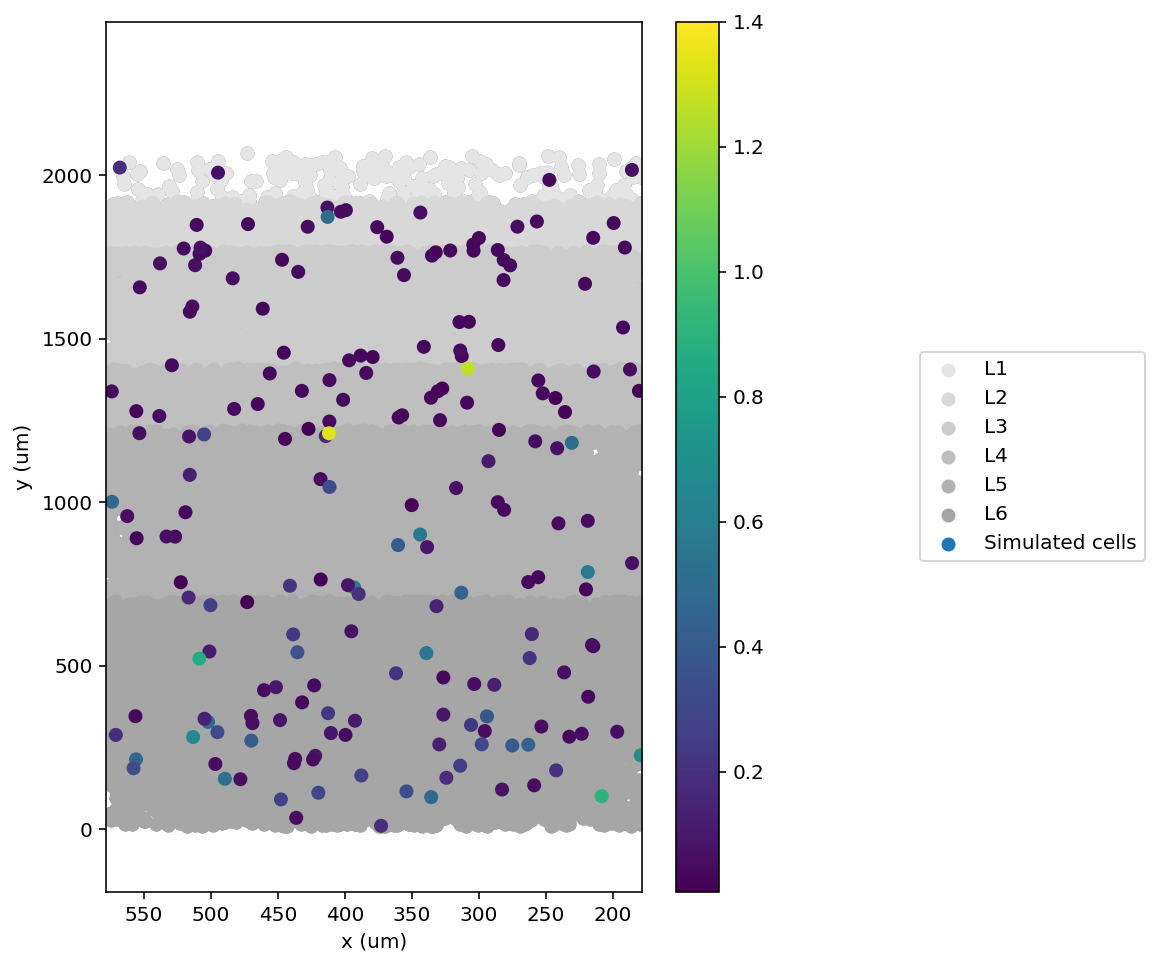

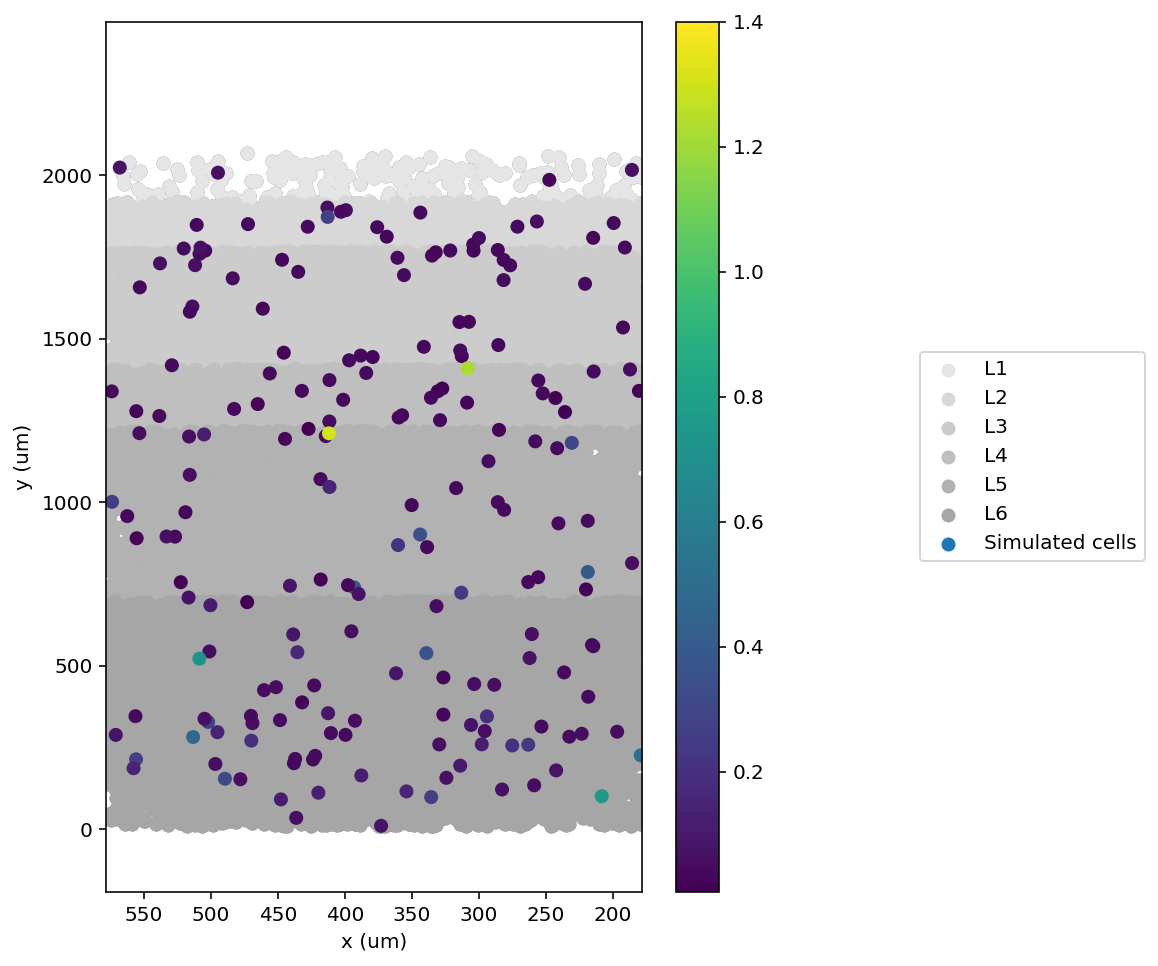

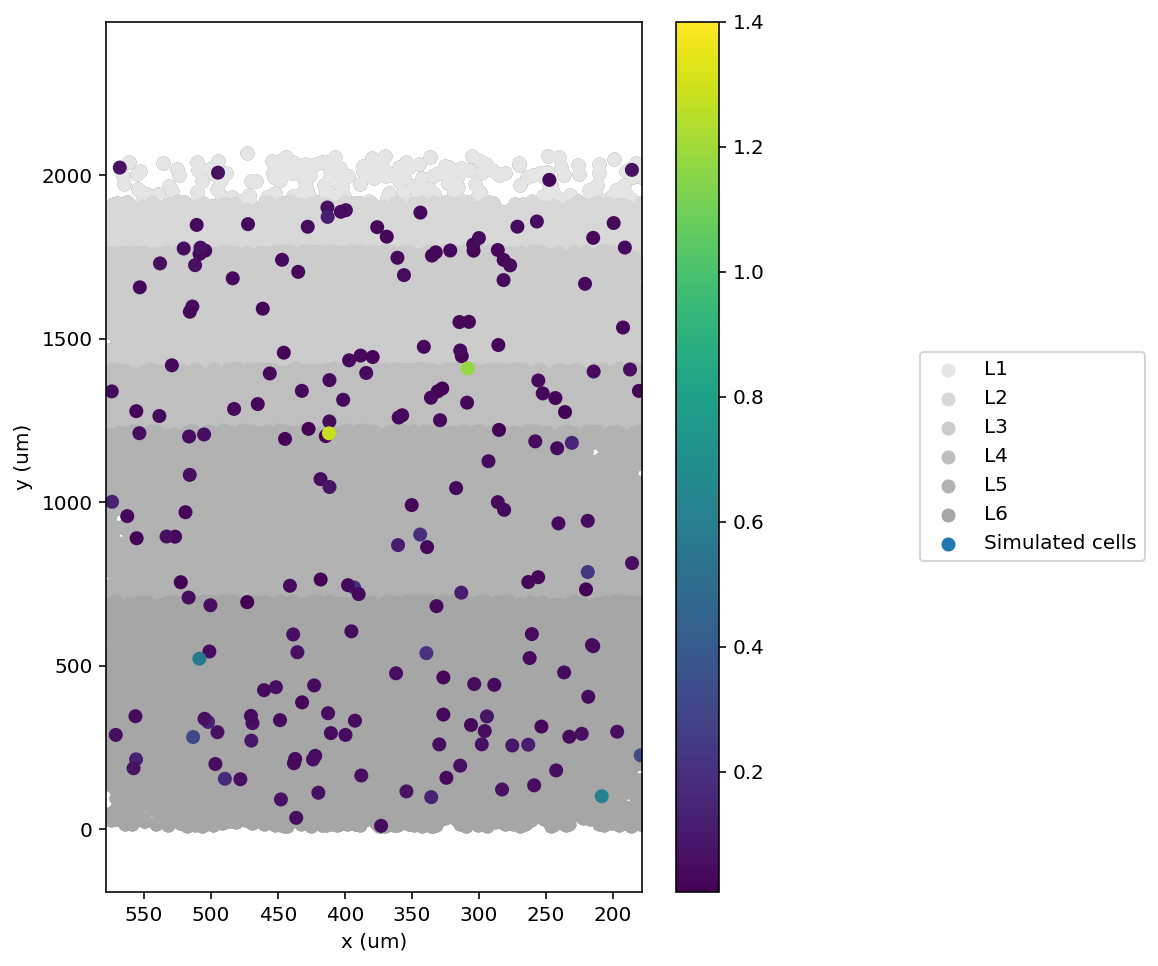

In [30]:
fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

onepercent_feat["with_met_ATP_n"] = onepercent_feat["with_met_ATP_n"].astype(float)

vmin=np.min(onepercent_feat['with_met_ATP_n'].tolist()) #+ l5mc_feat_mean['with_met_ATP_n'].tolist())
vmax=np.max(onepercent_feat['with_met_ATP_n'].tolist()) # + l5mc_feat_mean['with_met_ATP_n'].tolist())

    
ims = []
for i in list(onepercent_feat['idxm'].unique()):
    
    fig, ax = plt.subplots(figsize=(6, 8))

    ax1 = ax.scatter(mc2_cells[Cell.X], mc2_cells[Cell.Y], color='gray', label='') 

    x_min = mc2_cells[Cell.X].max()
    x_max = mc2_cells[Cell.X].min()

    y_min = mc2_cells[Cell.Y].min() 
    y_max = mc2_cells[Cell.Y].max()


    ax1 = ax.scatter(l1[Cell.X], l1[Cell.Y], color='#e5e5e5', label='L1')
    ax1 = ax.scatter(l2[Cell.X], l2[Cell.Y],  color='#d8d8d8', label='L2')
    ax1 = ax.scatter(l3[Cell.X], l3[Cell.Y], color='#cccccc', label='L3')
    ax1 = ax.scatter(l4[Cell.X], l4[Cell.Y],  color='#bfbfbf', label='L4')
    ax1 = ax.scatter(l5[Cell.X], l5[Cell.Y],  color='#b2b2b2', label='L5')
    ax1 = ax.scatter(l6[Cell.X], l6[Cell.Y],  color='#a6a6a6', label='L6') 

    ax2 = ax.scatter(onepercent_feat.loc[onepercent_feat['idxm']==i,'x'], onepercent_feat.loc[onepercent_feat['idxm']==i,'y'], c=onepercent_feat.loc[onepercent_feat['idxm']==i,'with_met_ATP_n'], vmin=vmin, vmax=vmax, label='Simulated cells') #cmap=cmap, 

    plt.ylabel('Layer')
    plt.ylabel('y (um)')
    plt.xlabel('x (um)')

    plt.xlim([x_min, x_max])
    plt.ylim([y_min-200, y_max+400])

    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

    fig.colorbar(ax2)
    
    
    
    im = fig #plt.imshow(fig)
    ims.append([im])

    #fig.savefig(f'plots/ATP_{i}.png',dpi=300, bbox_inches='tight', transparent=True)
    #fig.savefig(f'plots/ATPfullnostim_1percentShown_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    fig.savefig(f'plots/ATPgenThalam_1percentShown_{i}_23nov2020.png',dpi=300, bbox_inches='tight', transparent=True)
    